## Skip-gram 
text8 data 중 1000개의 단어를 사용하여 학습

데이터 출처 (https://www.kaggle.com/ashukr/implementation-of-word2vec-paper/data)

참고 (https://github.com/WegraLee/deep-learning-from-scratch-2/blob/master/ch03/simple_skip_gram.py)

In [23]:
file = open('C:/Users/ellyj/Documents/NLP/text8.txt', 'r')

In [24]:
x = file.read()

In [26]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul,SoftmaxWithLoss 
from common.trainer import Trainer
from common.optimizer import Adam
from simple_cbow import SimpleCBOW
from common.util import preprocess, create_contexts_target, convert_one_hot

In [27]:
class SimpleSkipGram:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer = MatMul(W_in) # 입력층
        self.out_layer = MatMul(W_out) # 출력층
        self.loss_layer1 = SoftmaxWithLoss() # Softmax 계층
        self.loss_layer2 = SoftmaxWithLoss() # Softmax 계층

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h)
        l1 = self.loss_layer1.forward(s, contexts[:, 0])
        l2 = self.loss_layer2.forward(s, contexts[:, 1])
        loss = l1 + l2
        return loss

    def backward(self, dout=1):
        dl1 = self.loss_layer1.backward(dout)
        dl2 = self.loss_layer2.backward(dout)
        ds = dl1 + dl2
        dh = self.out_layer.backward(ds)
        self.in_layer.backward(dh)
        return None

In [28]:
## 학습데이터 준비과정
window_size = 1 
hidden_size = 5 # 은닉층의 뉴런수
batch_size = 3
max_epoch = 1000

text = x # 데이터
corpus, word_to_id, id_to_word = preprocess(text) # corpus를 단어 id로 반환

vocab_size = len(word_to_id) # 어휘 수
contexts, target = create_contexts_target(corpus, window_size) # 중심, 주변단어 반환

# one-hot encoding
target = convert_one_hot(target, vocab_size) 
contexts = convert_one_hot(contexts, vocab_size)

## 모델학습
model_2 = SimpleSkipGram(vocab_size, hidden_size)
optimizer = Adam()
trainer_2 = Trainer(model_2, optimizer)

trainer_2.fit(contexts, target, max_epoch, batch_size)

| 에폭 1 |  반복 1 / 333 | 시간 0[s] | 손실 12.19
| 에폭 1 |  반복 21 / 333 | 시간 0[s] | 손실 12.19
| 에폭 1 |  반복 41 / 333 | 시간 0[s] | 손실 12.19
| 에폭 1 |  반복 61 / 333 | 시간 0[s] | 손실 12.19
| 에폭 1 |  반복 81 / 333 | 시간 0[s] | 손실 12.19
| 에폭 1 |  반복 101 / 333 | 시간 0[s] | 손실 12.19
| 에폭 1 |  반복 121 / 333 | 시간 0[s] | 손실 12.19
| 에폭 1 |  반복 141 / 333 | 시간 0[s] | 손실 12.19
| 에폭 1 |  반복 161 / 333 | 시간 0[s] | 손실 12.19
| 에폭 1 |  반복 181 / 333 | 시간 0[s] | 손실 12.19
| 에폭 1 |  반복 201 / 333 | 시간 0[s] | 손실 12.19
| 에폭 1 |  반복 221 / 333 | 시간 0[s] | 손실 12.19
| 에폭 1 |  반복 241 / 333 | 시간 0[s] | 손실 12.18
| 에폭 1 |  반복 261 / 333 | 시간 0[s] | 손실 12.18
| 에폭 1 |  반복 281 / 333 | 시간 0[s] | 손실 12.19
| 에폭 1 |  반복 301 / 333 | 시간 0[s] | 손실 12.18
| 에폭 1 |  반복 321 / 333 | 시간 0[s] | 손실 12.18
| 에폭 2 |  반복 1 / 333 | 시간 0[s] | 손실 12.18
| 에폭 2 |  반복 21 / 333 | 시간 0[s] | 손실 12.17
| 에폭 2 |  반복 41 / 333 | 시간 0[s] | 손실 12.17
| 에폭 2 |  반복 61 / 333 | 시간 0[s] | 손실 12.17
| 에폭 2 |  반복 81 / 333 | 시간 0[s] | 손실 12.17
| 에폭 2 |  반복 101 / 333 | 시간 0[s] | 손실 12.16


| 에폭 12 |  반복 241 / 333 | 시간 3[s] | 손실 11.02
| 에폭 12 |  반복 261 / 333 | 시간 3[s] | 손실 10.76
| 에폭 12 |  반복 281 / 333 | 시간 3[s] | 손실 10.79
| 에폭 12 |  반복 301 / 333 | 시간 3[s] | 손실 10.82
| 에폭 12 |  반복 321 / 333 | 시간 3[s] | 손실 10.69
| 에폭 13 |  반복 1 / 333 | 시간 3[s] | 손실 10.75
| 에폭 13 |  반복 21 / 333 | 시간 3[s] | 손실 10.62
| 에폭 13 |  반복 41 / 333 | 시간 3[s] | 손실 10.75
| 에폭 13 |  반복 61 / 333 | 시간 3[s] | 손실 11.02
| 에폭 13 |  반복 81 / 333 | 시간 3[s] | 손실 10.68
| 에폭 13 |  반복 101 / 333 | 시간 3[s] | 손실 10.42
| 에폭 13 |  반복 121 / 333 | 시간 3[s] | 손실 10.55
| 에폭 13 |  반복 141 / 333 | 시간 3[s] | 손실 10.69
| 에폭 13 |  반복 161 / 333 | 시간 3[s] | 손실 10.73
| 에폭 13 |  반복 181 / 333 | 시간 3[s] | 손실 10.35
| 에폭 13 |  반복 201 / 333 | 시간 3[s] | 손실 10.61
| 에폭 13 |  반복 221 / 333 | 시간 3[s] | 손실 10.66
| 에폭 13 |  반복 241 / 333 | 시간 3[s] | 손실 10.66
| 에폭 13 |  반복 261 / 333 | 시간 3[s] | 손실 10.31
| 에폭 13 |  반복 281 / 333 | 시간 3[s] | 손실 10.95
| 에폭 13 |  반복 301 / 333 | 시간 3[s] | 손실 10.93
| 에폭 13 |  반복 321 / 333 | 시간 3[s] | 손실 11.04
| 에폭 14 |  반복 1 

| 에폭 23 |  반복 261 / 333 | 시간 5[s] | 손실 9.95
| 에폭 23 |  반복 281 / 333 | 시간 6[s] | 손실 9.95
| 에폭 23 |  반복 301 / 333 | 시간 6[s] | 손실 9.71
| 에폭 23 |  반복 321 / 333 | 시간 6[s] | 손실 10.14
| 에폭 24 |  반복 1 / 333 | 시간 6[s] | 손실 9.59
| 에폭 24 |  반복 21 / 333 | 시간 6[s] | 손실 10.25
| 에폭 24 |  반복 41 / 333 | 시간 6[s] | 손실 9.44
| 에폭 24 |  반복 61 / 333 | 시간 6[s] | 손실 9.61
| 에폭 24 |  반복 81 / 333 | 시간 6[s] | 손실 9.72
| 에폭 24 |  반복 101 / 333 | 시간 6[s] | 손실 9.94
| 에폭 24 |  반복 121 / 333 | 시간 6[s] | 손실 10.10
| 에폭 24 |  반복 141 / 333 | 시간 6[s] | 손실 10.20
| 에폭 24 |  반복 161 / 333 | 시간 6[s] | 손실 10.28
| 에폭 24 |  반복 181 / 333 | 시간 6[s] | 손실 9.78
| 에폭 24 |  반복 201 / 333 | 시간 6[s] | 손실 10.08
| 에폭 24 |  반복 221 / 333 | 시간 6[s] | 손실 9.36
| 에폭 24 |  반복 241 / 333 | 시간 6[s] | 손실 9.76
| 에폭 24 |  반복 261 / 333 | 시간 6[s] | 손실 9.86
| 에폭 24 |  반복 281 / 333 | 시간 6[s] | 손실 9.90
| 에폭 24 |  반복 301 / 333 | 시간 6[s] | 손실 9.85
| 에폭 24 |  반복 321 / 333 | 시간 6[s] | 손실 9.80
| 에폭 25 |  반복 1 / 333 | 시간 6[s] | 손실 10.16
| 에폭 25 |  반복 21 / 333 | 시간 6[s] 

| 에폭 35 |  반복 221 / 333 | 시간 9[s] | 손실 9.45
| 에폭 35 |  반복 241 / 333 | 시간 9[s] | 손실 9.20
| 에폭 35 |  반복 261 / 333 | 시간 9[s] | 손실 9.18
| 에폭 35 |  반복 281 / 333 | 시간 9[s] | 손실 9.66
| 에폭 35 |  반복 301 / 333 | 시간 9[s] | 손실 9.21
| 에폭 35 |  반복 321 / 333 | 시간 9[s] | 손실 9.29
| 에폭 36 |  반복 1 / 333 | 시간 9[s] | 손실 8.82
| 에폭 36 |  반복 21 / 333 | 시간 9[s] | 손실 9.24
| 에폭 36 |  반복 41 / 333 | 시간 9[s] | 손실 9.29
| 에폭 36 |  반복 61 / 333 | 시간 9[s] | 손실 9.30
| 에폭 36 |  반복 81 / 333 | 시간 9[s] | 손실 8.98
| 에폭 36 |  반복 101 / 333 | 시간 9[s] | 손실 9.19
| 에폭 36 |  반복 121 / 333 | 시간 9[s] | 손실 9.34
| 에폭 36 |  반복 141 / 333 | 시간 9[s] | 손실 9.27
| 에폭 36 |  반복 161 / 333 | 시간 9[s] | 손실 9.31
| 에폭 36 |  반복 181 / 333 | 시간 9[s] | 손실 8.75
| 에폭 36 |  반복 201 / 333 | 시간 9[s] | 손실 9.36
| 에폭 36 |  반복 221 / 333 | 시간 9[s] | 손실 9.47
| 에폭 36 |  반복 241 / 333 | 시간 9[s] | 손실 9.19
| 에폭 36 |  반복 261 / 333 | 시간 9[s] | 손실 9.29
| 에폭 36 |  반복 281 / 333 | 시간 9[s] | 손실 9.36
| 에폭 36 |  반복 301 / 333 | 시간 9[s] | 손실 9.26
| 에폭 36 |  반복 321 / 333 | 시간 9[s] | 손실

| 에폭 47 |  반복 101 / 333 | 시간 11[s] | 손실 8.29
| 에폭 47 |  반복 121 / 333 | 시간 11[s] | 손실 8.77
| 에폭 47 |  반복 141 / 333 | 시간 11[s] | 손실 8.75
| 에폭 47 |  반복 161 / 333 | 시간 12[s] | 손실 8.88
| 에폭 47 |  반복 181 / 333 | 시간 12[s] | 손실 8.81
| 에폭 47 |  반복 201 / 333 | 시간 12[s] | 손실 8.63
| 에폭 47 |  반복 221 / 333 | 시간 12[s] | 손실 9.11
| 에폭 47 |  반복 241 / 333 | 시간 12[s] | 손실 8.91
| 에폭 47 |  반복 261 / 333 | 시간 12[s] | 손실 8.66
| 에폭 47 |  반복 281 / 333 | 시간 12[s] | 손실 8.46
| 에폭 47 |  반복 301 / 333 | 시간 12[s] | 손실 9.04
| 에폭 47 |  반복 321 / 333 | 시간 12[s] | 손실 8.64
| 에폭 48 |  반복 1 / 333 | 시간 12[s] | 손실 8.69
| 에폭 48 |  반복 21 / 333 | 시간 12[s] | 손실 8.58
| 에폭 48 |  반복 41 / 333 | 시간 12[s] | 손실 8.94
| 에폭 48 |  반복 61 / 333 | 시간 12[s] | 손실 8.81
| 에폭 48 |  반복 81 / 333 | 시간 12[s] | 손실 8.76
| 에폭 48 |  반복 101 / 333 | 시간 12[s] | 손실 8.48
| 에폭 48 |  반복 121 / 333 | 시간 12[s] | 손실 8.84
| 에폭 48 |  반복 141 / 333 | 시간 12[s] | 손실 8.44
| 에폭 48 |  반복 161 / 333 | 시간 12[s] | 손실 8.90
| 에폭 48 |  반복 181 / 333 | 시간 12[s] | 손실 8.59
| 에폭 48 |  반복 20

| 에폭 58 |  반복 101 / 333 | 시간 14[s] | 손실 8.42
| 에폭 58 |  반복 121 / 333 | 시간 14[s] | 손실 8.73
| 에폭 58 |  반복 141 / 333 | 시간 14[s] | 손실 8.33
| 에폭 58 |  반복 161 / 333 | 시간 14[s] | 손실 8.26
| 에폭 58 |  반복 181 / 333 | 시간 14[s] | 손실 7.91
| 에폭 58 |  반복 201 / 333 | 시간 14[s] | 손실 8.30
| 에폭 58 |  반복 221 / 333 | 시간 14[s] | 손실 8.43
| 에폭 58 |  반복 241 / 333 | 시간 14[s] | 손실 8.17
| 에폭 58 |  반복 261 / 333 | 시간 14[s] | 손실 7.88
| 에폭 58 |  반복 281 / 333 | 시간 14[s] | 손실 8.37
| 에폭 58 |  반복 301 / 333 | 시간 14[s] | 손실 8.73
| 에폭 58 |  반복 321 / 333 | 시간 14[s] | 손실 8.93
| 에폭 59 |  반복 1 / 333 | 시간 14[s] | 손실 8.40
| 에폭 59 |  반복 21 / 333 | 시간 14[s] | 손실 8.49
| 에폭 59 |  반복 41 / 333 | 시간 14[s] | 손실 7.90
| 에폭 59 |  반복 61 / 333 | 시간 14[s] | 손실 8.47
| 에폭 59 |  반복 81 / 333 | 시간 14[s] | 손실 8.69
| 에폭 59 |  반복 101 / 333 | 시간 14[s] | 손실 7.82
| 에폭 59 |  반복 121 / 333 | 시간 14[s] | 손실 8.40
| 에폭 59 |  반복 141 / 333 | 시간 14[s] | 손실 8.52
| 에폭 59 |  반복 161 / 333 | 시간 14[s] | 손실 8.54
| 에폭 59 |  반복 181 / 333 | 시간 14[s] | 손실 8.19
| 에폭 59 |  반복 20

| 에폭 69 |  반복 221 / 333 | 시간 17[s] | 손실 8.05
| 에폭 69 |  반복 241 / 333 | 시간 17[s] | 손실 8.48
| 에폭 69 |  반복 261 / 333 | 시간 17[s] | 손실 7.94
| 에폭 69 |  반복 281 / 333 | 시간 17[s] | 손실 8.46
| 에폭 69 |  반복 301 / 333 | 시간 17[s] | 손실 8.21
| 에폭 69 |  반복 321 / 333 | 시간 17[s] | 손실 8.32
| 에폭 70 |  반복 1 / 333 | 시간 17[s] | 손실 7.90
| 에폭 70 |  반복 21 / 333 | 시간 17[s] | 손실 7.78
| 에폭 70 |  반복 41 / 333 | 시간 17[s] | 손실 7.99
| 에폭 70 |  반복 61 / 333 | 시간 17[s] | 손실 7.45
| 에폭 70 |  반복 81 / 333 | 시간 17[s] | 손실 8.01
| 에폭 70 |  반복 101 / 333 | 시간 17[s] | 손실 8.46
| 에폭 70 |  반복 121 / 333 | 시간 17[s] | 손실 7.82
| 에폭 70 |  반복 141 / 333 | 시간 17[s] | 손실 8.45
| 에폭 70 |  반복 161 / 333 | 시간 17[s] | 손실 7.90
| 에폭 70 |  반복 181 / 333 | 시간 17[s] | 손실 7.83
| 에폭 70 |  반복 201 / 333 | 시간 17[s] | 손실 8.38
| 에폭 70 |  반복 221 / 333 | 시간 17[s] | 손실 8.55
| 에폭 70 |  반복 241 / 333 | 시간 17[s] | 손실 8.33
| 에폭 70 |  반복 261 / 333 | 시간 17[s] | 손실 8.22
| 에폭 70 |  반복 281 / 333 | 시간 17[s] | 손실 8.14
| 에폭 70 |  반복 301 / 333 | 시간 17[s] | 손실 7.79
| 에폭 70 |  반복 32

| 에폭 81 |  반복 1 / 333 | 시간 20[s] | 손실 7.82
| 에폭 81 |  반복 21 / 333 | 시간 20[s] | 손실 7.76
| 에폭 81 |  반복 41 / 333 | 시간 20[s] | 손실 8.51
| 에폭 81 |  반복 61 / 333 | 시간 20[s] | 손실 7.84
| 에폭 81 |  반복 81 / 333 | 시간 20[s] | 손실 8.11
| 에폭 81 |  반복 101 / 333 | 시간 20[s] | 손실 8.25
| 에폭 81 |  반복 121 / 333 | 시간 20[s] | 손실 7.64
| 에폭 81 |  반복 141 / 333 | 시간 20[s] | 손실 8.14
| 에폭 81 |  반복 161 / 333 | 시간 20[s] | 손실 7.95
| 에폭 81 |  반복 181 / 333 | 시간 20[s] | 손실 8.11
| 에폭 81 |  반복 201 / 333 | 시간 20[s] | 손실 7.64
| 에폭 81 |  반복 221 / 333 | 시간 20[s] | 손실 7.80
| 에폭 81 |  반복 241 / 333 | 시간 20[s] | 손실 7.31
| 에폭 81 |  반복 261 / 333 | 시간 20[s] | 손실 8.18
| 에폭 81 |  반복 281 / 333 | 시간 20[s] | 손실 7.56
| 에폭 81 |  반복 301 / 333 | 시간 20[s] | 손실 7.86
| 에폭 81 |  반복 321 / 333 | 시간 20[s] | 손실 7.69
| 에폭 82 |  반복 1 / 333 | 시간 20[s] | 손실 7.69
| 에폭 82 |  반복 21 / 333 | 시간 20[s] | 손실 8.21
| 에폭 82 |  반복 41 / 333 | 시간 20[s] | 손실 7.58
| 에폭 82 |  반복 61 / 333 | 시간 20[s] | 손실 8.08
| 에폭 82 |  반복 81 / 333 | 시간 20[s] | 손실 7.70
| 에폭 82 |  반복 101 / 33

| 에폭 92 |  반복 61 / 333 | 시간 24[s] | 손실 7.52
| 에폭 92 |  반복 81 / 333 | 시간 24[s] | 손실 7.85
| 에폭 92 |  반복 101 / 333 | 시간 24[s] | 손실 7.96
| 에폭 92 |  반복 121 / 333 | 시간 24[s] | 손실 7.67
| 에폭 92 |  반복 141 / 333 | 시간 24[s] | 손실 7.91
| 에폭 92 |  반복 161 / 333 | 시간 24[s] | 손실 7.38
| 에폭 92 |  반복 181 / 333 | 시간 24[s] | 손실 7.67
| 에폭 92 |  반복 201 / 333 | 시간 24[s] | 손실 7.81
| 에폭 92 |  반복 221 / 333 | 시간 24[s] | 손실 7.42
| 에폭 92 |  반복 241 / 333 | 시간 24[s] | 손실 7.53
| 에폭 92 |  반복 261 / 333 | 시간 24[s] | 손실 7.74
| 에폭 92 |  반복 281 / 333 | 시간 24[s] | 손실 8.36
| 에폭 92 |  반복 301 / 333 | 시간 24[s] | 손실 7.53
| 에폭 92 |  반복 321 / 333 | 시간 24[s] | 손실 7.65
| 에폭 93 |  반복 1 / 333 | 시간 24[s] | 손실 7.02
| 에폭 93 |  반복 21 / 333 | 시간 24[s] | 손실 7.45
| 에폭 93 |  반복 41 / 333 | 시간 24[s] | 손실 8.12
| 에폭 93 |  반복 61 / 333 | 시간 24[s] | 손실 8.02
| 에폭 93 |  반복 81 / 333 | 시간 24[s] | 손실 7.51
| 에폭 93 |  반복 101 / 333 | 시간 24[s] | 손실 7.61
| 에폭 93 |  반복 121 / 333 | 시간 24[s] | 손실 7.48
| 에폭 93 |  반복 141 / 333 | 시간 24[s] | 손실 7.34
| 에폭 93 |  반복 161 

| 에폭 103 |  반복 1 / 333 | 시간 26[s] | 손실 6.95
| 에폭 103 |  반복 21 / 333 | 시간 26[s] | 손실 7.33
| 에폭 103 |  반복 41 / 333 | 시간 26[s] | 손실 7.96
| 에폭 103 |  반복 61 / 333 | 시간 26[s] | 손실 7.37
| 에폭 103 |  반복 81 / 333 | 시간 26[s] | 손실 7.94
| 에폭 103 |  반복 101 / 333 | 시간 26[s] | 손실 7.51
| 에폭 103 |  반복 121 / 333 | 시간 26[s] | 손실 7.40
| 에폭 103 |  반복 141 / 333 | 시간 26[s] | 손실 7.24
| 에폭 103 |  반복 161 / 333 | 시간 26[s] | 손실 7.89
| 에폭 103 |  반복 181 / 333 | 시간 26[s] | 손실 7.42
| 에폭 103 |  반복 201 / 333 | 시간 26[s] | 손실 7.59
| 에폭 103 |  반복 221 / 333 | 시간 26[s] | 손실 7.92
| 에폭 103 |  반복 241 / 333 | 시간 26[s] | 손실 7.70
| 에폭 103 |  반복 261 / 333 | 시간 26[s] | 손실 7.18
| 에폭 103 |  반복 281 / 333 | 시간 26[s] | 손실 7.51
| 에폭 103 |  반복 301 / 333 | 시간 26[s] | 손실 7.34
| 에폭 103 |  반복 321 / 333 | 시간 26[s] | 손실 7.72
| 에폭 104 |  반복 1 / 333 | 시간 26[s] | 손실 8.07
| 에폭 104 |  반복 21 / 333 | 시간 26[s] | 손실 7.46
| 에폭 104 |  반복 41 / 333 | 시간 26[s] | 손실 7.90
| 에폭 104 |  반복 61 / 333 | 시간 26[s] | 손실 7.31
| 에폭 104 |  반복 81 / 333 | 시간 26[s] | 손실 7.32


| 에폭 114 |  반복 41 / 333 | 시간 30[s] | 손실 7.19
| 에폭 114 |  반복 61 / 333 | 시간 30[s] | 손실 7.81
| 에폭 114 |  반복 81 / 333 | 시간 30[s] | 손실 7.49
| 에폭 114 |  반복 101 / 333 | 시간 30[s] | 손실 7.43
| 에폭 114 |  반복 121 / 333 | 시간 30[s] | 손실 7.98
| 에폭 114 |  반복 141 / 333 | 시간 30[s] | 손실 7.29
| 에폭 114 |  반복 161 / 333 | 시간 30[s] | 손실 7.10
| 에폭 114 |  반복 181 / 333 | 시간 30[s] | 손실 7.66
| 에폭 114 |  반복 201 / 333 | 시간 30[s] | 손실 7.74
| 에폭 114 |  반복 221 / 333 | 시간 30[s] | 손실 7.32
| 에폭 114 |  반복 241 / 333 | 시간 30[s] | 손실 7.29
| 에폭 114 |  반복 261 / 333 | 시간 30[s] | 손실 7.89
| 에폭 114 |  반복 281 / 333 | 시간 30[s] | 손실 7.27
| 에폭 114 |  반복 301 / 333 | 시간 30[s] | 손실 7.04
| 에폭 114 |  반복 321 / 333 | 시간 30[s] | 손실 7.49
| 에폭 115 |  반복 1 / 333 | 시간 30[s] | 손실 7.25
| 에폭 115 |  반복 21 / 333 | 시간 30[s] | 손실 7.75
| 에폭 115 |  반복 41 / 333 | 시간 30[s] | 손실 7.71
| 에폭 115 |  반복 61 / 333 | 시간 30[s] | 손실 7.65
| 에폭 115 |  반복 81 / 333 | 시간 30[s] | 손실 7.68
| 에폭 115 |  반복 101 / 333 | 시간 30[s] | 손실 7.92
| 에폭 115 |  반복 121 / 333 | 시간 30[s] | 손실 7.

| 에폭 124 |  반복 261 / 333 | 시간 33[s] | 손실 7.76
| 에폭 124 |  반복 281 / 333 | 시간 33[s] | 손실 7.91
| 에폭 124 |  반복 301 / 333 | 시간 33[s] | 손실 7.13
| 에폭 124 |  반복 321 / 333 | 시간 33[s] | 손실 7.56
| 에폭 125 |  반복 1 / 333 | 시간 33[s] | 손실 7.61
| 에폭 125 |  반복 21 / 333 | 시간 33[s] | 손실 7.34
| 에폭 125 |  반복 41 / 333 | 시간 33[s] | 손실 7.63
| 에폭 125 |  반복 61 / 333 | 시간 33[s] | 손실 7.56
| 에폭 125 |  반복 81 / 333 | 시간 33[s] | 손실 7.49
| 에폭 125 |  반복 101 / 333 | 시간 33[s] | 손실 7.26
| 에폭 125 |  반복 121 / 333 | 시간 33[s] | 손실 6.88
| 에폭 125 |  반복 141 / 333 | 시간 33[s] | 손실 7.47
| 에폭 125 |  반복 161 / 333 | 시간 33[s] | 손실 7.29
| 에폭 125 |  반복 181 / 333 | 시간 33[s] | 손실 8.25
| 에폭 125 |  반복 201 / 333 | 시간 33[s] | 손실 7.86
| 에폭 125 |  반복 221 / 333 | 시간 33[s] | 손실 6.70
| 에폭 125 |  반복 241 / 333 | 시간 33[s] | 손실 7.51
| 에폭 125 |  반복 261 / 333 | 시간 33[s] | 손실 7.07
| 에폭 125 |  반복 281 / 333 | 시간 33[s] | 손실 7.30
| 에폭 125 |  반복 301 / 333 | 시간 33[s] | 손실 7.28
| 에폭 125 |  반복 321 / 333 | 시간 33[s] | 손실 7.01
| 에폭 126 |  반복 1 / 333 | 시간 33[s] | 손실 7

| 에폭 135 |  반복 181 / 333 | 시간 36[s] | 손실 7.88
| 에폭 135 |  반복 201 / 333 | 시간 36[s] | 손실 7.51
| 에폭 135 |  반복 221 / 333 | 시간 36[s] | 손실 6.97
| 에폭 135 |  반복 241 / 333 | 시간 36[s] | 손실 7.02
| 에폭 135 |  반복 261 / 333 | 시간 36[s] | 손실 7.81
| 에폭 135 |  반복 281 / 333 | 시간 36[s] | 손실 7.12
| 에폭 135 |  반복 301 / 333 | 시간 36[s] | 손실 7.27
| 에폭 135 |  반복 321 / 333 | 시간 36[s] | 손실 7.31
| 에폭 136 |  반복 1 / 333 | 시간 36[s] | 손실 7.00
| 에폭 136 |  반복 21 / 333 | 시간 36[s] | 손실 7.20
| 에폭 136 |  반복 41 / 333 | 시간 36[s] | 손실 7.11
| 에폭 136 |  반복 61 / 333 | 시간 36[s] | 손실 7.58
| 에폭 136 |  반복 81 / 333 | 시간 36[s] | 손실 7.04
| 에폭 136 |  반복 101 / 333 | 시간 36[s] | 손실 7.52
| 에폭 136 |  반복 121 / 333 | 시간 36[s] | 손실 6.80
| 에폭 136 |  반복 141 / 333 | 시간 36[s] | 손실 6.87
| 에폭 136 |  반복 161 / 333 | 시간 36[s] | 손실 8.04
| 에폭 136 |  반복 181 / 333 | 시간 36[s] | 손실 6.85
| 에폭 136 |  반복 201 / 333 | 시간 36[s] | 손실 7.26
| 에폭 136 |  반복 221 / 333 | 시간 36[s] | 손실 6.89
| 에폭 136 |  반복 241 / 333 | 시간 36[s] | 손실 7.93
| 에폭 136 |  반복 261 / 333 | 시간 36[s] | 손실

| 에폭 146 |  반복 201 / 333 | 시간 38[s] | 손실 7.15
| 에폭 146 |  반복 221 / 333 | 시간 38[s] | 손실 7.81
| 에폭 146 |  반복 241 / 333 | 시간 38[s] | 손실 7.01
| 에폭 146 |  반복 261 / 333 | 시간 38[s] | 손실 7.63
| 에폭 146 |  반복 281 / 333 | 시간 38[s] | 손실 6.32
| 에폭 146 |  반복 301 / 333 | 시간 38[s] | 손실 6.76
| 에폭 146 |  반복 321 / 333 | 시간 38[s] | 손실 7.57
| 에폭 147 |  반복 1 / 333 | 시간 38[s] | 손실 6.98
| 에폭 147 |  반복 21 / 333 | 시간 38[s] | 손실 7.36
| 에폭 147 |  반복 41 / 333 | 시간 38[s] | 손실 7.46
| 에폭 147 |  반복 61 / 333 | 시간 38[s] | 손실 7.44
| 에폭 147 |  반복 81 / 333 | 시간 38[s] | 손실 6.64
| 에폭 147 |  반복 101 / 333 | 시간 38[s] | 손실 7.14
| 에폭 147 |  반복 121 / 333 | 시간 38[s] | 손실 7.32
| 에폭 147 |  반복 141 / 333 | 시간 38[s] | 손실 7.23
| 에폭 147 |  반복 161 / 333 | 시간 38[s] | 손실 7.36
| 에폭 147 |  반복 181 / 333 | 시간 38[s] | 손실 7.21
| 에폭 147 |  반복 201 / 333 | 시간 38[s] | 손실 6.85
| 에폭 147 |  반복 221 / 333 | 시간 38[s] | 손실 7.43
| 에폭 147 |  반복 241 / 333 | 시간 38[s] | 손실 7.42
| 에폭 147 |  반복 261 / 333 | 시간 38[s] | 손실 6.72
| 에폭 147 |  반복 281 / 333 | 시간 38[s] | 손실

| 에폭 157 |  반복 221 / 333 | 시간 41[s] | 손실 7.40
| 에폭 157 |  반복 241 / 333 | 시간 41[s] | 손실 6.87
| 에폭 157 |  반복 261 / 333 | 시간 41[s] | 손실 7.26
| 에폭 157 |  반복 281 / 333 | 시간 41[s] | 손실 7.06
| 에폭 157 |  반복 301 / 333 | 시간 41[s] | 손실 6.37
| 에폭 157 |  반복 321 / 333 | 시간 41[s] | 손실 6.45
| 에폭 158 |  반복 1 / 333 | 시간 41[s] | 손실 7.39
| 에폭 158 |  반복 21 / 333 | 시간 41[s] | 손실 6.86
| 에폭 158 |  반복 41 / 333 | 시간 41[s] | 손실 7.01
| 에폭 158 |  반복 61 / 333 | 시간 41[s] | 손실 7.51
| 에폭 158 |  반복 81 / 333 | 시간 41[s] | 손실 7.54
| 에폭 158 |  반복 101 / 333 | 시간 42[s] | 손실 6.73
| 에폭 158 |  반복 121 / 333 | 시간 42[s] | 손실 6.97
| 에폭 158 |  반복 141 / 333 | 시간 42[s] | 손실 7.48
| 에폭 158 |  반복 161 / 333 | 시간 42[s] | 손실 7.51
| 에폭 158 |  반복 181 / 333 | 시간 42[s] | 손실 7.30
| 에폭 158 |  반복 201 / 333 | 시간 42[s] | 손실 7.60
| 에폭 158 |  반복 221 / 333 | 시간 42[s] | 손실 6.92
| 에폭 158 |  반복 241 / 333 | 시간 42[s] | 손실 6.98
| 에폭 158 |  반복 261 / 333 | 시간 42[s] | 손실 6.57
| 에폭 158 |  반복 281 / 333 | 시간 42[s] | 손실 7.38
| 에폭 158 |  반복 301 / 333 | 시간 42[s] | 손실

| 에폭 168 |  반복 121 / 333 | 시간 44[s] | 손실 7.44
| 에폭 168 |  반복 141 / 333 | 시간 44[s] | 손실 7.06
| 에폭 168 |  반복 161 / 333 | 시간 44[s] | 손실 6.98
| 에폭 168 |  반복 181 / 333 | 시간 44[s] | 손실 7.54
| 에폭 168 |  반복 201 / 333 | 시간 44[s] | 손실 7.21
| 에폭 168 |  반복 221 / 333 | 시간 44[s] | 손실 6.82
| 에폭 168 |  반복 241 / 333 | 시간 44[s] | 손실 6.76
| 에폭 168 |  반복 261 / 333 | 시간 44[s] | 손실 6.90
| 에폭 168 |  반복 281 / 333 | 시간 44[s] | 손실 7.57
| 에폭 168 |  반복 301 / 333 | 시간 44[s] | 손실 7.25
| 에폭 168 |  반복 321 / 333 | 시간 44[s] | 손실 7.47
| 에폭 169 |  반복 1 / 333 | 시간 44[s] | 손실 7.13
| 에폭 169 |  반복 21 / 333 | 시간 44[s] | 손실 7.32
| 에폭 169 |  반복 41 / 333 | 시간 44[s] | 손실 6.90
| 에폭 169 |  반복 61 / 333 | 시간 44[s] | 손실 6.40
| 에폭 169 |  반복 81 / 333 | 시간 44[s] | 손실 6.85
| 에폭 169 |  반복 101 / 333 | 시간 44[s] | 손실 7.10
| 에폭 169 |  반복 121 / 333 | 시간 44[s] | 손실 6.92
| 에폭 169 |  반복 141 / 333 | 시간 44[s] | 손실 7.33
| 에폭 169 |  반복 161 / 333 | 시간 44[s] | 손실 7.24
| 에폭 169 |  반복 181 / 333 | 시간 44[s] | 손실 7.03
| 에폭 169 |  반복 201 / 333 | 시간 44[s] | 손실

| 에폭 179 |  반복 161 / 333 | 시간 47[s] | 손실 6.90
| 에폭 179 |  반복 181 / 333 | 시간 47[s] | 손실 6.64
| 에폭 179 |  반복 201 / 333 | 시간 47[s] | 손실 6.59
| 에폭 179 |  반복 221 / 333 | 시간 47[s] | 손실 7.20
| 에폭 179 |  반복 241 / 333 | 시간 47[s] | 손실 7.30
| 에폭 179 |  반복 261 / 333 | 시간 47[s] | 손실 7.40
| 에폭 179 |  반복 281 / 333 | 시간 47[s] | 손실 7.71
| 에폭 179 |  반복 301 / 333 | 시간 47[s] | 손실 6.93
| 에폭 179 |  반복 321 / 333 | 시간 47[s] | 손실 7.25
| 에폭 180 |  반복 1 / 333 | 시간 47[s] | 손실 7.46
| 에폭 180 |  반복 21 / 333 | 시간 47[s] | 손실 6.25
| 에폭 180 |  반복 41 / 333 | 시간 47[s] | 손실 7.28
| 에폭 180 |  반복 61 / 333 | 시간 47[s] | 손실 6.85
| 에폭 180 |  반복 81 / 333 | 시간 47[s] | 손실 7.02
| 에폭 180 |  반복 101 / 333 | 시간 47[s] | 손실 6.82
| 에폭 180 |  반복 121 / 333 | 시간 47[s] | 손실 6.78
| 에폭 180 |  반복 141 / 333 | 시간 47[s] | 손실 6.72
| 에폭 180 |  반복 161 / 333 | 시간 47[s] | 손실 7.27
| 에폭 180 |  반복 181 / 333 | 시간 47[s] | 손실 7.55
| 에폭 180 |  반복 201 / 333 | 시간 47[s] | 손실 7.15
| 에폭 180 |  반복 221 / 333 | 시간 47[s] | 손실 7.22
| 에폭 180 |  반복 241 / 333 | 시간 47[s] | 손실

| 에폭 190 |  반복 81 / 333 | 시간 50[s] | 손실 7.17
| 에폭 190 |  반복 101 / 333 | 시간 50[s] | 손실 7.56
| 에폭 190 |  반복 121 / 333 | 시간 50[s] | 손실 6.44
| 에폭 190 |  반복 141 / 333 | 시간 50[s] | 손실 6.72
| 에폭 190 |  반복 161 / 333 | 시간 50[s] | 손실 7.47
| 에폭 190 |  반복 181 / 333 | 시간 50[s] | 손실 6.82
| 에폭 190 |  반복 201 / 333 | 시간 50[s] | 손실 6.93
| 에폭 190 |  반복 221 / 333 | 시간 50[s] | 손실 6.90
| 에폭 190 |  반복 241 / 333 | 시간 50[s] | 손실 7.55
| 에폭 190 |  반복 261 / 333 | 시간 50[s] | 손실 7.51
| 에폭 190 |  반복 281 / 333 | 시간 50[s] | 손실 6.88
| 에폭 190 |  반복 301 / 333 | 시간 50[s] | 손실 7.09
| 에폭 190 |  반복 321 / 333 | 시간 50[s] | 손실 6.47
| 에폭 191 |  반복 1 / 333 | 시간 50[s] | 손실 6.39
| 에폭 191 |  반복 21 / 333 | 시간 50[s] | 손실 6.74
| 에폭 191 |  반복 41 / 333 | 시간 50[s] | 손실 6.72
| 에폭 191 |  반복 61 / 333 | 시간 50[s] | 손실 6.54
| 에폭 191 |  반복 81 / 333 | 시간 50[s] | 손실 7.44
| 에폭 191 |  반복 101 / 333 | 시간 50[s] | 손실 7.29
| 에폭 191 |  반복 121 / 333 | 시간 50[s] | 손실 7.15
| 에폭 191 |  반복 141 / 333 | 시간 50[s] | 손실 6.85
| 에폭 191 |  반복 161 / 333 | 시간 50[s] | 손실 

| 에폭 201 |  반복 1 / 333 | 시간 52[s] | 손실 7.16
| 에폭 201 |  반복 21 / 333 | 시간 52[s] | 손실 6.83
| 에폭 201 |  반복 41 / 333 | 시간 52[s] | 손실 7.05
| 에폭 201 |  반복 61 / 333 | 시간 52[s] | 손실 6.88
| 에폭 201 |  반복 81 / 333 | 시간 52[s] | 손실 6.35
| 에폭 201 |  반복 101 / 333 | 시간 53[s] | 손실 6.95
| 에폭 201 |  반복 121 / 333 | 시간 53[s] | 손실 7.08
| 에폭 201 |  반복 141 / 333 | 시간 53[s] | 손실 6.63
| 에폭 201 |  반복 161 / 333 | 시간 53[s] | 손실 7.71
| 에폭 201 |  반복 181 / 333 | 시간 53[s] | 손실 6.86
| 에폭 201 |  반복 201 / 333 | 시간 53[s] | 손실 6.49
| 에폭 201 |  반복 221 / 333 | 시간 53[s] | 손실 6.65
| 에폭 201 |  반복 241 / 333 | 시간 53[s] | 손실 6.93
| 에폭 201 |  반복 261 / 333 | 시간 53[s] | 손실 7.65
| 에폭 201 |  반복 281 / 333 | 시간 53[s] | 손실 7.34
| 에폭 201 |  반복 301 / 333 | 시간 53[s] | 손실 6.72
| 에폭 201 |  반복 321 / 333 | 시간 53[s] | 손실 6.46
| 에폭 202 |  반복 1 / 333 | 시간 53[s] | 손실 7.42
| 에폭 202 |  반복 21 / 333 | 시간 53[s] | 손실 7.05
| 에폭 202 |  반복 41 / 333 | 시간 53[s] | 손실 6.73
| 에폭 202 |  반복 61 / 333 | 시간 53[s] | 손실 6.12
| 에폭 202 |  반복 81 / 333 | 시간 53[s] | 손실 7.06


| 에폭 211 |  반복 241 / 333 | 시간 55[s] | 손실 6.64
| 에폭 211 |  반복 261 / 333 | 시간 56[s] | 손실 6.79
| 에폭 211 |  반복 281 / 333 | 시간 56[s] | 손실 6.62
| 에폭 211 |  반복 301 / 333 | 시간 56[s] | 손실 6.52
| 에폭 211 |  반복 321 / 333 | 시간 56[s] | 손실 7.39
| 에폭 212 |  반복 1 / 333 | 시간 56[s] | 손실 7.13
| 에폭 212 |  반복 21 / 333 | 시간 56[s] | 손실 6.65
| 에폭 212 |  반복 41 / 333 | 시간 56[s] | 손실 6.85
| 에폭 212 |  반복 61 / 333 | 시간 56[s] | 손실 7.58
| 에폭 212 |  반복 81 / 333 | 시간 56[s] | 손실 6.78
| 에폭 212 |  반복 101 / 333 | 시간 56[s] | 손실 5.90
| 에폭 212 |  반복 121 / 333 | 시간 56[s] | 손실 6.71
| 에폭 212 |  반복 141 / 333 | 시간 56[s] | 손실 7.07
| 에폭 212 |  반복 161 / 333 | 시간 56[s] | 손실 6.79
| 에폭 212 |  반복 181 / 333 | 시간 56[s] | 손실 6.77
| 에폭 212 |  반복 201 / 333 | 시간 56[s] | 손실 7.03
| 에폭 212 |  반복 221 / 333 | 시간 56[s] | 손실 7.02
| 에폭 212 |  반복 241 / 333 | 시간 56[s] | 손실 7.34
| 에폭 212 |  반복 261 / 333 | 시간 56[s] | 손실 7.34
| 에폭 212 |  반복 281 / 333 | 시간 56[s] | 손실 5.93
| 에폭 212 |  반복 301 / 333 | 시간 56[s] | 손실 7.37
| 에폭 212 |  반복 321 / 333 | 시간 56[s] | 손실

| 에폭 222 |  반복 301 / 333 | 시간 59[s] | 손실 6.81
| 에폭 222 |  반복 321 / 333 | 시간 59[s] | 손실 6.34
| 에폭 223 |  반복 1 / 333 | 시간 59[s] | 손실 7.41
| 에폭 223 |  반복 21 / 333 | 시간 59[s] | 손실 6.68
| 에폭 223 |  반복 41 / 333 | 시간 59[s] | 손실 7.25
| 에폭 223 |  반복 61 / 333 | 시간 59[s] | 손실 6.75
| 에폭 223 |  반복 81 / 333 | 시간 59[s] | 손실 6.98
| 에폭 223 |  반복 101 / 333 | 시간 59[s] | 손실 6.74
| 에폭 223 |  반복 121 / 333 | 시간 59[s] | 손실 7.15
| 에폭 223 |  반복 141 / 333 | 시간 59[s] | 손실 6.99
| 에폭 223 |  반복 161 / 333 | 시간 59[s] | 손실 6.72
| 에폭 223 |  반복 181 / 333 | 시간 59[s] | 손실 6.77
| 에폭 223 |  반복 201 / 333 | 시간 59[s] | 손실 6.50
| 에폭 223 |  반복 221 / 333 | 시간 59[s] | 손실 6.98
| 에폭 223 |  반복 241 / 333 | 시간 59[s] | 손실 6.75
| 에폭 223 |  반복 261 / 333 | 시간 59[s] | 손실 7.29
| 에폭 223 |  반복 281 / 333 | 시간 59[s] | 손실 6.59
| 에폭 223 |  반복 301 / 333 | 시간 59[s] | 손실 6.73
| 에폭 223 |  반복 321 / 333 | 시간 59[s] | 손실 6.59
| 에폭 224 |  반복 1 / 333 | 시간 59[s] | 손실 6.83
| 에폭 224 |  반복 21 / 333 | 시간 59[s] | 손실 6.69
| 에폭 224 |  반복 41 / 333 | 시간 59[s] | 손실 6.0

| 에폭 234 |  반복 1 / 333 | 시간 61[s] | 손실 6.62
| 에폭 234 |  반복 21 / 333 | 시간 61[s] | 손실 6.99
| 에폭 234 |  반복 41 / 333 | 시간 61[s] | 손실 6.51
| 에폭 234 |  반복 61 / 333 | 시간 61[s] | 손실 6.10
| 에폭 234 |  반복 81 / 333 | 시간 62[s] | 손실 6.90
| 에폭 234 |  반복 101 / 333 | 시간 62[s] | 손실 6.64
| 에폭 234 |  반복 121 / 333 | 시간 62[s] | 손실 6.41
| 에폭 234 |  반복 141 / 333 | 시간 62[s] | 손실 6.95
| 에폭 234 |  반복 161 / 333 | 시간 62[s] | 손실 6.57
| 에폭 234 |  반복 181 / 333 | 시간 62[s] | 손실 6.78
| 에폭 234 |  반복 201 / 333 | 시간 62[s] | 손실 7.03
| 에폭 234 |  반복 221 / 333 | 시간 62[s] | 손실 7.13
| 에폭 234 |  반복 241 / 333 | 시간 62[s] | 손실 7.01
| 에폭 234 |  반복 261 / 333 | 시간 62[s] | 손실 6.68
| 에폭 234 |  반복 281 / 333 | 시간 62[s] | 손실 6.86
| 에폭 234 |  반복 301 / 333 | 시간 62[s] | 손실 6.51
| 에폭 234 |  반복 321 / 333 | 시간 62[s] | 손실 7.50
| 에폭 235 |  반복 1 / 333 | 시간 62[s] | 손실 7.40
| 에폭 235 |  반복 21 / 333 | 시간 62[s] | 손실 6.38
| 에폭 235 |  반복 41 / 333 | 시간 62[s] | 손실 6.15
| 에폭 235 |  반복 61 / 333 | 시간 62[s] | 손실 6.76
| 에폭 235 |  반복 81 / 333 | 시간 62[s] | 손실 6.89


| 에폭 245 |  반복 121 / 333 | 시간 64[s] | 손실 6.98
| 에폭 245 |  반복 141 / 333 | 시간 64[s] | 손실 6.46
| 에폭 245 |  반복 161 / 333 | 시간 64[s] | 손실 7.24
| 에폭 245 |  반복 181 / 333 | 시간 64[s] | 손실 7.01
| 에폭 245 |  반복 201 / 333 | 시간 64[s] | 손실 6.57
| 에폭 245 |  반복 221 / 333 | 시간 64[s] | 손실 6.89
| 에폭 245 |  반복 241 / 333 | 시간 64[s] | 손실 6.73
| 에폭 245 |  반복 261 / 333 | 시간 64[s] | 손실 6.71
| 에폭 245 |  반복 281 / 333 | 시간 64[s] | 손실 6.91
| 에폭 245 |  반복 301 / 333 | 시간 64[s] | 손실 6.96
| 에폭 245 |  반복 321 / 333 | 시간 64[s] | 손실 6.61
| 에폭 246 |  반복 1 / 333 | 시간 64[s] | 손실 6.33
| 에폭 246 |  반복 21 / 333 | 시간 64[s] | 손실 6.86
| 에폭 246 |  반복 41 / 333 | 시간 64[s] | 손실 6.22
| 에폭 246 |  반복 61 / 333 | 시간 64[s] | 손실 6.69
| 에폭 246 |  반복 81 / 333 | 시간 65[s] | 손실 7.20
| 에폭 246 |  반복 101 / 333 | 시간 65[s] | 손실 6.43
| 에폭 246 |  반복 121 / 333 | 시간 65[s] | 손실 6.16
| 에폭 246 |  반복 141 / 333 | 시간 65[s] | 손실 7.07
| 에폭 246 |  반복 161 / 333 | 시간 65[s] | 손실 6.67
| 에폭 246 |  반복 181 / 333 | 시간 65[s] | 손실 6.49
| 에폭 246 |  반복 201 / 333 | 시간 65[s] | 손실

| 에폭 256 |  반복 221 / 333 | 시간 67[s] | 손실 7.01
| 에폭 256 |  반복 241 / 333 | 시간 67[s] | 손실 7.33
| 에폭 256 |  반복 261 / 333 | 시간 67[s] | 손실 7.52
| 에폭 256 |  반복 281 / 333 | 시간 67[s] | 손실 6.92
| 에폭 256 |  반복 301 / 333 | 시간 67[s] | 손실 6.58
| 에폭 256 |  반복 321 / 333 | 시간 67[s] | 손실 6.04
| 에폭 257 |  반복 1 / 333 | 시간 67[s] | 손실 6.98
| 에폭 257 |  반복 21 / 333 | 시간 67[s] | 손실 6.49
| 에폭 257 |  반복 41 / 333 | 시간 67[s] | 손실 6.89
| 에폭 257 |  반복 61 / 333 | 시간 67[s] | 손실 7.10
| 에폭 257 |  반복 81 / 333 | 시간 67[s] | 손실 6.74
| 에폭 257 |  반복 101 / 333 | 시간 67[s] | 손실 6.36
| 에폭 257 |  반복 121 / 333 | 시간 67[s] | 손실 6.73
| 에폭 257 |  반복 141 / 333 | 시간 67[s] | 손실 7.06
| 에폭 257 |  반복 161 / 333 | 시간 67[s] | 손실 6.77
| 에폭 257 |  반복 181 / 333 | 시간 67[s] | 손실 7.44
| 에폭 257 |  반복 201 / 333 | 시간 67[s] | 손실 6.84
| 에폭 257 |  반복 221 / 333 | 시간 67[s] | 손실 6.35
| 에폭 257 |  반복 241 / 333 | 시간 67[s] | 손실 6.51
| 에폭 257 |  반복 261 / 333 | 시간 67[s] | 손실 6.62
| 에폭 257 |  반복 281 / 333 | 시간 67[s] | 손실 6.35
| 에폭 257 |  반복 301 / 333 | 시간 67[s] | 손실

| 에폭 267 |  반복 121 / 333 | 시간 70[s] | 손실 6.77
| 에폭 267 |  반복 141 / 333 | 시간 70[s] | 손실 6.86
| 에폭 267 |  반복 161 / 333 | 시간 70[s] | 손실 6.28
| 에폭 267 |  반복 181 / 333 | 시간 70[s] | 손실 6.78
| 에폭 267 |  반복 201 / 333 | 시간 70[s] | 손실 6.62
| 에폭 267 |  반복 221 / 333 | 시간 70[s] | 손실 6.38
| 에폭 267 |  반복 241 / 333 | 시간 70[s] | 손실 6.36
| 에폭 267 |  반복 261 / 333 | 시간 70[s] | 손실 6.83
| 에폭 267 |  반복 281 / 333 | 시간 70[s] | 손실 6.53
| 에폭 267 |  반복 301 / 333 | 시간 70[s] | 손실 6.99
| 에폭 267 |  반복 321 / 333 | 시간 70[s] | 손실 7.26
| 에폭 268 |  반복 1 / 333 | 시간 70[s] | 손실 6.28
| 에폭 268 |  반복 21 / 333 | 시간 70[s] | 손실 5.86
| 에폭 268 |  반복 41 / 333 | 시간 70[s] | 손실 5.85
| 에폭 268 |  반복 61 / 333 | 시간 70[s] | 손실 7.31
| 에폭 268 |  반복 81 / 333 | 시간 70[s] | 손실 6.95
| 에폭 268 |  반복 101 / 333 | 시간 70[s] | 손실 6.15
| 에폭 268 |  반복 121 / 333 | 시간 70[s] | 손실 6.73
| 에폭 268 |  반복 141 / 333 | 시간 70[s] | 손실 6.96
| 에폭 268 |  반복 161 / 333 | 시간 70[s] | 손실 6.53
| 에폭 268 |  반복 181 / 333 | 시간 70[s] | 손실 6.19
| 에폭 268 |  반복 201 / 333 | 시간 70[s] | 손실

| 에폭 278 |  반복 41 / 333 | 시간 73[s] | 손실 7.42
| 에폭 278 |  반복 61 / 333 | 시간 73[s] | 손실 6.39
| 에폭 278 |  반복 81 / 333 | 시간 73[s] | 손실 7.11
| 에폭 278 |  반복 101 / 333 | 시간 73[s] | 손실 7.03
| 에폭 278 |  반복 121 / 333 | 시간 73[s] | 손실 6.48
| 에폭 278 |  반복 141 / 333 | 시간 73[s] | 손실 6.64
| 에폭 278 |  반복 161 / 333 | 시간 73[s] | 손실 6.93
| 에폭 278 |  반복 181 / 333 | 시간 73[s] | 손실 7.04
| 에폭 278 |  반복 201 / 333 | 시간 73[s] | 손실 7.05
| 에폭 278 |  반복 221 / 333 | 시간 73[s] | 손실 6.67
| 에폭 278 |  반복 241 / 333 | 시간 73[s] | 손실 6.25
| 에폭 278 |  반복 261 / 333 | 시간 73[s] | 손실 6.28
| 에폭 278 |  반복 281 / 333 | 시간 73[s] | 손실 6.76
| 에폭 278 |  반복 301 / 333 | 시간 73[s] | 손실 6.08
| 에폭 278 |  반복 321 / 333 | 시간 73[s] | 손실 5.85
| 에폭 279 |  반복 1 / 333 | 시간 73[s] | 손실 6.65
| 에폭 279 |  반복 21 / 333 | 시간 73[s] | 손실 6.54
| 에폭 279 |  반복 41 / 333 | 시간 73[s] | 손실 6.80
| 에폭 279 |  반복 61 / 333 | 시간 73[s] | 손실 6.71
| 에폭 279 |  반복 81 / 333 | 시간 73[s] | 손실 7.47
| 에폭 279 |  반복 101 / 333 | 시간 73[s] | 손실 6.88
| 에폭 279 |  반복 121 / 333 | 시간 73[s] | 손실 6.

| 에폭 288 |  반복 321 / 333 | 시간 75[s] | 손실 6.71
| 에폭 289 |  반복 1 / 333 | 시간 75[s] | 손실 6.06
| 에폭 289 |  반복 21 / 333 | 시간 75[s] | 손실 6.90
| 에폭 289 |  반복 41 / 333 | 시간 75[s] | 손실 6.55
| 에폭 289 |  반복 61 / 333 | 시간 75[s] | 손실 6.16
| 에폭 289 |  반복 81 / 333 | 시간 75[s] | 손실 6.13
| 에폭 289 |  반복 101 / 333 | 시간 75[s] | 손실 7.31
| 에폭 289 |  반복 121 / 333 | 시간 75[s] | 손실 6.63
| 에폭 289 |  반복 141 / 333 | 시간 75[s] | 손실 6.45
| 에폭 289 |  반복 161 / 333 | 시간 75[s] | 손실 6.52
| 에폭 289 |  반복 181 / 333 | 시간 75[s] | 손실 6.80
| 에폭 289 |  반복 201 / 333 | 시간 75[s] | 손실 6.16
| 에폭 289 |  반복 221 / 333 | 시간 75[s] | 손실 6.87
| 에폭 289 |  반복 241 / 333 | 시간 75[s] | 손실 6.81
| 에폭 289 |  반복 261 / 333 | 시간 75[s] | 손실 6.70
| 에폭 289 |  반복 281 / 333 | 시간 75[s] | 손실 6.75
| 에폭 289 |  반복 301 / 333 | 시간 75[s] | 손실 6.18
| 에폭 289 |  반복 321 / 333 | 시간 76[s] | 손실 6.90
| 에폭 290 |  반복 1 / 333 | 시간 76[s] | 손실 7.61
| 에폭 290 |  반복 21 / 333 | 시간 76[s] | 손실 6.54
| 에폭 290 |  반복 41 / 333 | 시간 76[s] | 손실 6.68
| 에폭 290 |  반복 61 / 333 | 시간 76[s] | 손실 6.75

| 에폭 300 |  반복 41 / 333 | 시간 78[s] | 손실 7.21
| 에폭 300 |  반복 61 / 333 | 시간 78[s] | 손실 7.50
| 에폭 300 |  반복 81 / 333 | 시간 78[s] | 손실 6.72
| 에폭 300 |  반복 101 / 333 | 시간 78[s] | 손실 6.97
| 에폭 300 |  반복 121 / 333 | 시간 78[s] | 손실 6.30
| 에폭 300 |  반복 141 / 333 | 시간 78[s] | 손실 6.18
| 에폭 300 |  반복 161 / 333 | 시간 78[s] | 손실 6.16
| 에폭 300 |  반복 181 / 333 | 시간 78[s] | 손실 6.51
| 에폭 300 |  반복 201 / 333 | 시간 78[s] | 손실 6.77
| 에폭 300 |  반복 221 / 333 | 시간 78[s] | 손실 6.37
| 에폭 300 |  반복 241 / 333 | 시간 78[s] | 손실 6.60
| 에폭 300 |  반복 261 / 333 | 시간 78[s] | 손실 7.15
| 에폭 300 |  반복 281 / 333 | 시간 78[s] | 손실 6.47
| 에폭 300 |  반복 301 / 333 | 시간 78[s] | 손실 6.13
| 에폭 300 |  반복 321 / 333 | 시간 78[s] | 손실 6.54
| 에폭 301 |  반복 1 / 333 | 시간 78[s] | 손실 6.86
| 에폭 301 |  반복 21 / 333 | 시간 78[s] | 손실 6.78
| 에폭 301 |  반복 41 / 333 | 시간 78[s] | 손실 6.45
| 에폭 301 |  반복 61 / 333 | 시간 78[s] | 손실 6.69
| 에폭 301 |  반복 81 / 333 | 시간 78[s] | 손실 6.55
| 에폭 301 |  반복 101 / 333 | 시간 78[s] | 손실 6.39
| 에폭 301 |  반복 121 / 333 | 시간 78[s] | 손실 6.

| 에폭 310 |  반복 241 / 333 | 시간 81[s] | 손실 6.29
| 에폭 310 |  반복 261 / 333 | 시간 81[s] | 손실 5.96
| 에폭 310 |  반복 281 / 333 | 시간 81[s] | 손실 6.53
| 에폭 310 |  반복 301 / 333 | 시간 81[s] | 손실 6.33
| 에폭 310 |  반복 321 / 333 | 시간 81[s] | 손실 6.41
| 에폭 311 |  반복 1 / 333 | 시간 81[s] | 손실 6.47
| 에폭 311 |  반복 21 / 333 | 시간 81[s] | 손실 5.91
| 에폭 311 |  반복 41 / 333 | 시간 81[s] | 손실 6.78
| 에폭 311 |  반복 61 / 333 | 시간 81[s] | 손실 7.01
| 에폭 311 |  반복 81 / 333 | 시간 81[s] | 손실 6.92
| 에폭 311 |  반복 101 / 333 | 시간 81[s] | 손실 6.49
| 에폭 311 |  반복 121 / 333 | 시간 81[s] | 손실 6.10
| 에폭 311 |  반복 141 / 333 | 시간 81[s] | 손실 6.52
| 에폭 311 |  반복 161 / 333 | 시간 81[s] | 손실 6.74
| 에폭 311 |  반복 181 / 333 | 시간 81[s] | 손실 6.25
| 에폭 311 |  반복 201 / 333 | 시간 81[s] | 손실 6.73
| 에폭 311 |  반복 221 / 333 | 시간 81[s] | 손실 7.03
| 에폭 311 |  반복 241 / 333 | 시간 81[s] | 손실 6.78
| 에폭 311 |  반복 261 / 333 | 시간 81[s] | 손실 6.37
| 에폭 311 |  반복 281 / 333 | 시간 81[s] | 손실 6.97
| 에폭 311 |  반복 301 / 333 | 시간 81[s] | 손실 6.81
| 에폭 311 |  반복 321 / 333 | 시간 81[s] | 손실

| 에폭 321 |  반복 141 / 333 | 시간 83[s] | 손실 6.43
| 에폭 321 |  반복 161 / 333 | 시간 83[s] | 손실 6.33
| 에폭 321 |  반복 181 / 333 | 시간 83[s] | 손실 6.39
| 에폭 321 |  반복 201 / 333 | 시간 83[s] | 손실 6.93
| 에폭 321 |  반복 221 / 333 | 시간 83[s] | 손실 7.18
| 에폭 321 |  반복 241 / 333 | 시간 83[s] | 손실 6.55
| 에폭 321 |  반복 261 / 333 | 시간 83[s] | 손실 6.67
| 에폭 321 |  반복 281 / 333 | 시간 83[s] | 손실 6.48
| 에폭 321 |  반복 301 / 333 | 시간 83[s] | 손실 6.26
| 에폭 321 |  반복 321 / 333 | 시간 83[s] | 손실 6.61
| 에폭 322 |  반복 1 / 333 | 시간 83[s] | 손실 7.48
| 에폭 322 |  반복 21 / 333 | 시간 83[s] | 손실 6.32
| 에폭 322 |  반복 41 / 333 | 시간 83[s] | 손실 6.57
| 에폭 322 |  반복 61 / 333 | 시간 83[s] | 손실 6.18
| 에폭 322 |  반복 81 / 333 | 시간 83[s] | 손실 6.52
| 에폭 322 |  반복 101 / 333 | 시간 83[s] | 손실 6.35
| 에폭 322 |  반복 121 / 333 | 시간 83[s] | 손실 6.83
| 에폭 322 |  반복 141 / 333 | 시간 83[s] | 손실 6.82
| 에폭 322 |  반복 161 / 333 | 시간 83[s] | 손실 6.17
| 에폭 322 |  반복 181 / 333 | 시간 83[s] | 손실 6.52
| 에폭 322 |  반복 201 / 333 | 시간 84[s] | 손실 6.78
| 에폭 322 |  반복 221 / 333 | 시간 84[s] | 손실

| 에폭 332 |  반복 201 / 333 | 시간 86[s] | 손실 6.43
| 에폭 332 |  반복 221 / 333 | 시간 86[s] | 손실 6.44
| 에폭 332 |  반복 241 / 333 | 시간 86[s] | 손실 6.35
| 에폭 332 |  반복 261 / 333 | 시간 86[s] | 손실 6.80
| 에폭 332 |  반복 281 / 333 | 시간 86[s] | 손실 6.53
| 에폭 332 |  반복 301 / 333 | 시간 86[s] | 손실 6.57
| 에폭 332 |  반복 321 / 333 | 시간 86[s] | 손실 6.28
| 에폭 333 |  반복 1 / 333 | 시간 86[s] | 손실 6.70
| 에폭 333 |  반복 21 / 333 | 시간 86[s] | 손실 6.35
| 에폭 333 |  반복 41 / 333 | 시간 86[s] | 손실 6.52
| 에폭 333 |  반복 61 / 333 | 시간 86[s] | 손실 6.81
| 에폭 333 |  반복 81 / 333 | 시간 86[s] | 손실 6.07
| 에폭 333 |  반복 101 / 333 | 시간 86[s] | 손실 6.44
| 에폭 333 |  반복 121 / 333 | 시간 86[s] | 손실 6.20
| 에폭 333 |  반복 141 / 333 | 시간 86[s] | 손실 6.63
| 에폭 333 |  반복 161 / 333 | 시간 86[s] | 손실 6.56
| 에폭 333 |  반복 181 / 333 | 시간 86[s] | 손실 7.06
| 에폭 333 |  반복 201 / 333 | 시간 86[s] | 손실 6.95
| 에폭 333 |  반복 221 / 333 | 시간 87[s] | 손실 6.30
| 에폭 333 |  반복 241 / 333 | 시간 87[s] | 손실 6.80
| 에폭 333 |  반복 261 / 333 | 시간 87[s] | 손실 5.68
| 에폭 333 |  반복 281 / 333 | 시간 87[s] | 손실

| 에폭 343 |  반복 81 / 333 | 시간 89[s] | 손실 6.35
| 에폭 343 |  반복 101 / 333 | 시간 89[s] | 손실 6.43
| 에폭 343 |  반복 121 / 333 | 시간 89[s] | 손실 6.07
| 에폭 343 |  반복 141 / 333 | 시간 89[s] | 손실 6.97
| 에폭 343 |  반복 161 / 333 | 시간 89[s] | 손실 7.02
| 에폭 343 |  반복 181 / 333 | 시간 89[s] | 손실 6.96
| 에폭 343 |  반복 201 / 333 | 시간 89[s] | 손실 6.50
| 에폭 343 |  반복 221 / 333 | 시간 89[s] | 손실 6.68
| 에폭 343 |  반복 241 / 333 | 시간 89[s] | 손실 7.77
| 에폭 343 |  반복 261 / 333 | 시간 89[s] | 손실 7.13
| 에폭 343 |  반복 281 / 333 | 시간 89[s] | 손실 6.14
| 에폭 343 |  반복 301 / 333 | 시간 89[s] | 손실 6.58
| 에폭 343 |  반복 321 / 333 | 시간 89[s] | 손실 5.66
| 에폭 344 |  반복 1 / 333 | 시간 89[s] | 손실 5.90
| 에폭 344 |  반복 21 / 333 | 시간 89[s] | 손실 6.87
| 에폭 344 |  반복 41 / 333 | 시간 89[s] | 손실 6.54
| 에폭 344 |  반복 61 / 333 | 시간 89[s] | 손실 6.82
| 에폭 344 |  반복 81 / 333 | 시간 89[s] | 손실 6.49
| 에폭 344 |  반복 101 / 333 | 시간 89[s] | 손실 7.03
| 에폭 344 |  반복 121 / 333 | 시간 89[s] | 손실 5.92
| 에폭 344 |  반복 141 / 333 | 시간 89[s] | 손실 6.65
| 에폭 344 |  반복 161 / 333 | 시간 89[s] | 손실 

| 에폭 354 |  반복 201 / 333 | 시간 92[s] | 손실 6.29
| 에폭 354 |  반복 221 / 333 | 시간 92[s] | 손실 6.08
| 에폭 354 |  반복 241 / 333 | 시간 92[s] | 손실 6.90
| 에폭 354 |  반복 261 / 333 | 시간 92[s] | 손실 7.12
| 에폭 354 |  반복 281 / 333 | 시간 92[s] | 손실 6.42
| 에폭 354 |  반복 301 / 333 | 시간 92[s] | 손실 7.00
| 에폭 354 |  반복 321 / 333 | 시간 92[s] | 손실 6.73
| 에폭 355 |  반복 1 / 333 | 시간 92[s] | 손실 6.86
| 에폭 355 |  반복 21 / 333 | 시간 92[s] | 손실 5.44
| 에폭 355 |  반복 41 / 333 | 시간 92[s] | 손실 6.57
| 에폭 355 |  반복 61 / 333 | 시간 92[s] | 손실 5.57
| 에폭 355 |  반복 81 / 333 | 시간 92[s] | 손실 7.25
| 에폭 355 |  반복 101 / 333 | 시간 92[s] | 손실 7.11
| 에폭 355 |  반복 121 / 333 | 시간 92[s] | 손실 6.90
| 에폭 355 |  반복 141 / 333 | 시간 92[s] | 손실 6.60
| 에폭 355 |  반복 161 / 333 | 시간 92[s] | 손실 6.65
| 에폭 355 |  반복 181 / 333 | 시간 92[s] | 손실 6.61
| 에폭 355 |  반복 201 / 333 | 시간 92[s] | 손실 6.54
| 에폭 355 |  반복 221 / 333 | 시간 92[s] | 손실 6.77
| 에폭 355 |  반복 241 / 333 | 시간 92[s] | 손실 6.64
| 에폭 355 |  반복 261 / 333 | 시간 92[s] | 손실 5.97
| 에폭 355 |  반복 281 / 333 | 시간 92[s] | 손실

| 에폭 365 |  반복 321 / 333 | 시간 95[s] | 손실 6.59
| 에폭 366 |  반복 1 / 333 | 시간 95[s] | 손실 6.85
| 에폭 366 |  반복 21 / 333 | 시간 95[s] | 손실 6.86
| 에폭 366 |  반복 41 / 333 | 시간 95[s] | 손실 5.90
| 에폭 366 |  반복 61 / 333 | 시간 95[s] | 손실 6.64
| 에폭 366 |  반복 81 / 333 | 시간 95[s] | 손실 6.50
| 에폭 366 |  반복 101 / 333 | 시간 95[s] | 손실 6.92
| 에폭 366 |  반복 121 / 333 | 시간 95[s] | 손실 6.06
| 에폭 366 |  반복 141 / 333 | 시간 95[s] | 손실 7.03
| 에폭 366 |  반복 161 / 333 | 시간 95[s] | 손실 6.35
| 에폭 366 |  반복 181 / 333 | 시간 95[s] | 손실 6.11
| 에폭 366 |  반복 201 / 333 | 시간 95[s] | 손실 6.18
| 에폭 366 |  반복 221 / 333 | 시간 95[s] | 손실 7.09
| 에폭 366 |  반복 241 / 333 | 시간 95[s] | 손실 6.69
| 에폭 366 |  반복 261 / 333 | 시간 95[s] | 손실 6.23
| 에폭 366 |  반복 281 / 333 | 시간 95[s] | 손실 6.33
| 에폭 366 |  반복 301 / 333 | 시간 95[s] | 손실 6.91
| 에폭 366 |  반복 321 / 333 | 시간 95[s] | 손실 6.19
| 에폭 367 |  반복 1 / 333 | 시간 95[s] | 손실 6.30
| 에폭 367 |  반복 21 / 333 | 시간 95[s] | 손실 6.10
| 에폭 367 |  반복 41 / 333 | 시간 95[s] | 손실 6.44
| 에폭 367 |  반복 61 / 333 | 시간 95[s] | 손실 6.52

| 에폭 377 |  반복 41 / 333 | 시간 98[s] | 손실 6.53
| 에폭 377 |  반복 61 / 333 | 시간 98[s] | 손실 6.17
| 에폭 377 |  반복 81 / 333 | 시간 98[s] | 손실 6.79
| 에폭 377 |  반복 101 / 333 | 시간 98[s] | 손실 6.61
| 에폭 377 |  반복 121 / 333 | 시간 98[s] | 손실 6.31
| 에폭 377 |  반복 141 / 333 | 시간 98[s] | 손실 6.32
| 에폭 377 |  반복 161 / 333 | 시간 98[s] | 손실 6.85
| 에폭 377 |  반복 181 / 333 | 시간 98[s] | 손실 6.21
| 에폭 377 |  반복 201 / 333 | 시간 98[s] | 손실 6.37
| 에폭 377 |  반복 221 / 333 | 시간 98[s] | 손실 7.07
| 에폭 377 |  반복 241 / 333 | 시간 98[s] | 손실 6.08
| 에폭 377 |  반복 261 / 333 | 시간 98[s] | 손실 5.78
| 에폭 377 |  반복 281 / 333 | 시간 98[s] | 손실 6.79
| 에폭 377 |  반복 301 / 333 | 시간 98[s] | 손실 6.92
| 에폭 377 |  반복 321 / 333 | 시간 98[s] | 손실 6.24
| 에폭 378 |  반복 1 / 333 | 시간 98[s] | 손실 7.38
| 에폭 378 |  반복 21 / 333 | 시간 98[s] | 손실 6.48
| 에폭 378 |  반복 41 / 333 | 시간 98[s] | 손실 6.96
| 에폭 378 |  반복 61 / 333 | 시간 98[s] | 손실 6.79
| 에폭 378 |  반복 81 / 333 | 시간 98[s] | 손실 6.23
| 에폭 378 |  반복 101 / 333 | 시간 98[s] | 손실 6.19
| 에폭 378 |  반복 121 / 333 | 시간 98[s] | 손실 6.

| 에폭 387 |  반복 321 / 333 | 시간 101[s] | 손실 5.98
| 에폭 388 |  반복 1 / 333 | 시간 101[s] | 손실 7.22
| 에폭 388 |  반복 21 / 333 | 시간 101[s] | 손실 6.82
| 에폭 388 |  반복 41 / 333 | 시간 101[s] | 손실 6.20
| 에폭 388 |  반복 61 / 333 | 시간 101[s] | 손실 6.05
| 에폭 388 |  반복 81 / 333 | 시간 101[s] | 손실 6.97
| 에폭 388 |  반복 101 / 333 | 시간 101[s] | 손실 5.82
| 에폭 388 |  반복 121 / 333 | 시간 101[s] | 손실 6.68
| 에폭 388 |  반복 141 / 333 | 시간 101[s] | 손실 6.37
| 에폭 388 |  반복 161 / 333 | 시간 101[s] | 손실 6.64
| 에폭 388 |  반복 181 / 333 | 시간 101[s] | 손실 6.45
| 에폭 388 |  반복 201 / 333 | 시간 101[s] | 손실 6.40
| 에폭 388 |  반복 221 / 333 | 시간 101[s] | 손실 6.34
| 에폭 388 |  반복 241 / 333 | 시간 101[s] | 손실 6.82
| 에폭 388 |  반복 261 / 333 | 시간 101[s] | 손실 6.30
| 에폭 388 |  반복 281 / 333 | 시간 101[s] | 손실 6.50
| 에폭 388 |  반복 301 / 333 | 시간 101[s] | 손실 6.03
| 에폭 388 |  반복 321 / 333 | 시간 101[s] | 손실 6.81
| 에폭 389 |  반복 1 / 333 | 시간 101[s] | 손실 6.32
| 에폭 389 |  반복 21 / 333 | 시간 101[s] | 손실 6.39
| 에폭 389 |  반복 41 / 333 | 시간 101[s] | 손실 6.94
| 에폭 389 |  반복 61 / 333

| 에폭 398 |  반복 181 / 333 | 시간 103[s] | 손실 6.97
| 에폭 398 |  반복 201 / 333 | 시간 103[s] | 손실 6.76
| 에폭 398 |  반복 221 / 333 | 시간 103[s] | 손실 6.51
| 에폭 398 |  반복 241 / 333 | 시간 103[s] | 손실 6.34
| 에폭 398 |  반복 261 / 333 | 시간 103[s] | 손실 6.17
| 에폭 398 |  반복 281 / 333 | 시간 103[s] | 손실 6.64
| 에폭 398 |  반복 301 / 333 | 시간 103[s] | 손실 6.20
| 에폭 398 |  반복 321 / 333 | 시간 103[s] | 손실 5.86
| 에폭 399 |  반복 1 / 333 | 시간 103[s] | 손실 7.01
| 에폭 399 |  반복 21 / 333 | 시간 103[s] | 손실 6.63
| 에폭 399 |  반복 41 / 333 | 시간 103[s] | 손실 6.62
| 에폭 399 |  반복 61 / 333 | 시간 103[s] | 손실 6.73
| 에폭 399 |  반복 81 / 333 | 시간 103[s] | 손실 6.20
| 에폭 399 |  반복 101 / 333 | 시간 103[s] | 손실 6.89
| 에폭 399 |  반복 121 / 333 | 시간 103[s] | 손실 6.04
| 에폭 399 |  반복 141 / 333 | 시간 103[s] | 손실 6.44
| 에폭 399 |  반복 161 / 333 | 시간 103[s] | 손실 6.50
| 에폭 399 |  반복 181 / 333 | 시간 103[s] | 손실 6.14
| 에폭 399 |  반복 201 / 333 | 시간 103[s] | 손실 6.50
| 에폭 399 |  반복 221 / 333 | 시간 103[s] | 손실 5.79
| 에폭 399 |  반복 241 / 333 | 시간 103[s] | 손실 6.23
| 에폭 399 |  반복 261 

| 에폭 409 |  반복 141 / 333 | 시간 106[s] | 손실 6.93
| 에폭 409 |  반복 161 / 333 | 시간 106[s] | 손실 5.69
| 에폭 409 |  반복 181 / 333 | 시간 106[s] | 손실 6.33
| 에폭 409 |  반복 201 / 333 | 시간 106[s] | 손실 6.33
| 에폭 409 |  반복 221 / 333 | 시간 106[s] | 손실 5.86
| 에폭 409 |  반복 241 / 333 | 시간 106[s] | 손실 5.79
| 에폭 409 |  반복 261 / 333 | 시간 106[s] | 손실 6.75
| 에폭 409 |  반복 281 / 333 | 시간 106[s] | 손실 6.12
| 에폭 409 |  반복 301 / 333 | 시간 106[s] | 손실 5.78
| 에폭 409 |  반복 321 / 333 | 시간 106[s] | 손실 7.42
| 에폭 410 |  반복 1 / 333 | 시간 106[s] | 손실 7.00
| 에폭 410 |  반복 21 / 333 | 시간 106[s] | 손실 5.92
| 에폭 410 |  반복 41 / 333 | 시간 106[s] | 손실 5.56
| 에폭 410 |  반복 61 / 333 | 시간 106[s] | 손실 6.47
| 에폭 410 |  반복 81 / 333 | 시간 106[s] | 손실 6.13
| 에폭 410 |  반복 101 / 333 | 시간 106[s] | 손실 6.73
| 에폭 410 |  반복 121 / 333 | 시간 106[s] | 손실 5.95
| 에폭 410 |  반복 141 / 333 | 시간 106[s] | 손실 6.76
| 에폭 410 |  반복 161 / 333 | 시간 106[s] | 손실 6.42
| 에폭 410 |  반복 181 / 333 | 시간 106[s] | 손실 6.21
| 에폭 410 |  반복 201 / 333 | 시간 106[s] | 손실 5.60
| 에폭 410 |  반복 221 

| 에폭 419 |  반복 281 / 333 | 시간 108[s] | 손실 6.16
| 에폭 419 |  반복 301 / 333 | 시간 108[s] | 손실 6.56
| 에폭 419 |  반복 321 / 333 | 시간 108[s] | 손실 6.26
| 에폭 420 |  반복 1 / 333 | 시간 108[s] | 손실 6.29
| 에폭 420 |  반복 21 / 333 | 시간 108[s] | 손실 6.22
| 에폭 420 |  반복 41 / 333 | 시간 108[s] | 손실 6.70
| 에폭 420 |  반복 61 / 333 | 시간 108[s] | 손실 7.03
| 에폭 420 |  반복 81 / 333 | 시간 108[s] | 손실 7.26
| 에폭 420 |  반복 101 / 333 | 시간 108[s] | 손실 6.47
| 에폭 420 |  반복 121 / 333 | 시간 108[s] | 손실 6.32
| 에폭 420 |  반복 141 / 333 | 시간 108[s] | 손실 5.94
| 에폭 420 |  반복 161 / 333 | 시간 108[s] | 손실 6.21
| 에폭 420 |  반복 181 / 333 | 시간 108[s] | 손실 6.65
| 에폭 420 |  반복 201 / 333 | 시간 108[s] | 손실 5.85
| 에폭 420 |  반복 221 / 333 | 시간 109[s] | 손실 6.17
| 에폭 420 |  반복 241 / 333 | 시간 109[s] | 손실 6.43
| 에폭 420 |  반복 261 / 333 | 시간 109[s] | 손실 6.62
| 에폭 420 |  반복 281 / 333 | 시간 109[s] | 손실 6.37
| 에폭 420 |  반복 301 / 333 | 시간 109[s] | 손실 6.22
| 에폭 420 |  반복 321 / 333 | 시간 109[s] | 손실 6.00
| 에폭 421 |  반복 1 / 333 | 시간 109[s] | 손실 6.73
| 에폭 421 |  반복 21 / 3

| 에폭 430 |  반복 101 / 333 | 시간 111[s] | 손실 7.02
| 에폭 430 |  반복 121 / 333 | 시간 111[s] | 손실 7.07
| 에폭 430 |  반복 141 / 333 | 시간 111[s] | 손실 6.13
| 에폭 430 |  반복 161 / 333 | 시간 111[s] | 손실 6.09
| 에폭 430 |  반복 181 / 333 | 시간 111[s] | 손실 6.52
| 에폭 430 |  반복 201 / 333 | 시간 111[s] | 손실 6.63
| 에폭 430 |  반복 221 / 333 | 시간 111[s] | 손실 5.56
| 에폭 430 |  반복 241 / 333 | 시간 111[s] | 손실 5.81
| 에폭 430 |  반복 261 / 333 | 시간 111[s] | 손실 6.80
| 에폭 430 |  반복 281 / 333 | 시간 111[s] | 손실 6.30
| 에폭 430 |  반복 301 / 333 | 시간 111[s] | 손실 6.43
| 에폭 430 |  반복 321 / 333 | 시간 111[s] | 손실 5.92
| 에폭 431 |  반복 1 / 333 | 시간 111[s] | 손실 6.56
| 에폭 431 |  반복 21 / 333 | 시간 111[s] | 손실 6.14
| 에폭 431 |  반복 41 / 333 | 시간 111[s] | 손실 6.36
| 에폭 431 |  반복 61 / 333 | 시간 111[s] | 손실 6.64
| 에폭 431 |  반복 81 / 333 | 시간 111[s] | 손실 7.05
| 에폭 431 |  반복 101 / 333 | 시간 111[s] | 손실 6.23
| 에폭 431 |  반복 121 / 333 | 시간 111[s] | 손실 6.52
| 에폭 431 |  반복 141 / 333 | 시간 111[s] | 손실 6.03
| 에폭 431 |  반복 161 / 333 | 시간 111[s] | 손실 6.23
| 에폭 431 |  반복 181 

| 에폭 440 |  반복 321 / 333 | 시간 113[s] | 손실 5.91
| 에폭 441 |  반복 1 / 333 | 시간 113[s] | 손실 6.70
| 에폭 441 |  반복 21 / 333 | 시간 113[s] | 손실 6.21
| 에폭 441 |  반복 41 / 333 | 시간 113[s] | 손실 6.98
| 에폭 441 |  반복 61 / 333 | 시간 113[s] | 손실 5.65
| 에폭 441 |  반복 81 / 333 | 시간 113[s] | 손실 6.26
| 에폭 441 |  반복 101 / 333 | 시간 113[s] | 손실 6.68
| 에폭 441 |  반복 121 / 333 | 시간 113[s] | 손실 6.80
| 에폭 441 |  반복 141 / 333 | 시간 113[s] | 손실 6.84
| 에폭 441 |  반복 161 / 333 | 시간 113[s] | 손실 5.88
| 에폭 441 |  반복 181 / 333 | 시간 113[s] | 손실 7.30
| 에폭 441 |  반복 201 / 333 | 시간 114[s] | 손실 5.55
| 에폭 441 |  반복 221 / 333 | 시간 114[s] | 손실 6.49
| 에폭 441 |  반복 241 / 333 | 시간 114[s] | 손실 6.52
| 에폭 441 |  반복 261 / 333 | 시간 114[s] | 손실 6.09
| 에폭 441 |  반복 281 / 333 | 시간 114[s] | 손실 6.46
| 에폭 441 |  반복 301 / 333 | 시간 114[s] | 손실 5.65
| 에폭 441 |  반복 321 / 333 | 시간 114[s] | 손실 6.76
| 에폭 442 |  반복 1 / 333 | 시간 114[s] | 손실 6.53
| 에폭 442 |  반복 21 / 333 | 시간 114[s] | 손실 6.53
| 에폭 442 |  반복 41 / 333 | 시간 114[s] | 손실 6.06
| 에폭 442 |  반복 61 / 333

| 에폭 452 |  반복 1 / 333 | 시간 116[s] | 손실 6.39
| 에폭 452 |  반복 21 / 333 | 시간 116[s] | 손실 5.85
| 에폭 452 |  반복 41 / 333 | 시간 116[s] | 손실 5.98
| 에폭 452 |  반복 61 / 333 | 시간 116[s] | 손실 6.70
| 에폭 452 |  반복 81 / 333 | 시간 116[s] | 손실 6.22
| 에폭 452 |  반복 101 / 333 | 시간 116[s] | 손실 6.41
| 에폭 452 |  반복 121 / 333 | 시간 116[s] | 손실 6.58
| 에폭 452 |  반복 141 / 333 | 시간 116[s] | 손실 6.04
| 에폭 452 |  반복 161 / 333 | 시간 116[s] | 손실 6.51
| 에폭 452 |  반복 181 / 333 | 시간 116[s] | 손실 7.26
| 에폭 452 |  반복 201 / 333 | 시간 116[s] | 손실 6.45
| 에폭 452 |  반복 221 / 333 | 시간 116[s] | 손실 5.96
| 에폭 452 |  반복 241 / 333 | 시간 116[s] | 손실 6.13
| 에폭 452 |  반복 261 / 333 | 시간 116[s] | 손실 6.45
| 에폭 452 |  반복 281 / 333 | 시간 116[s] | 손실 6.10
| 에폭 452 |  반복 301 / 333 | 시간 116[s] | 손실 6.85
| 에폭 452 |  반복 321 / 333 | 시간 116[s] | 손실 6.37
| 에폭 453 |  반복 1 / 333 | 시간 116[s] | 손실 6.24
| 에폭 453 |  반복 21 / 333 | 시간 116[s] | 손실 5.96
| 에폭 453 |  반복 41 / 333 | 시간 116[s] | 손실 6.55
| 에폭 453 |  반복 61 / 333 | 시간 116[s] | 손실 6.99
| 에폭 453 |  반복 81 / 333 

| 에폭 462 |  반복 161 / 333 | 시간 118[s] | 손실 6.07
| 에폭 462 |  반복 181 / 333 | 시간 118[s] | 손실 6.54
| 에폭 462 |  반복 201 / 333 | 시간 118[s] | 손실 5.97
| 에폭 462 |  반복 221 / 333 | 시간 119[s] | 손실 6.68
| 에폭 462 |  반복 241 / 333 | 시간 119[s] | 손실 6.27
| 에폭 462 |  반복 261 / 333 | 시간 119[s] | 손실 6.51
| 에폭 462 |  반복 281 / 333 | 시간 119[s] | 손실 6.17
| 에폭 462 |  반복 301 / 333 | 시간 119[s] | 손실 6.58
| 에폭 462 |  반복 321 / 333 | 시간 119[s] | 손실 6.25
| 에폭 463 |  반복 1 / 333 | 시간 119[s] | 손실 6.33
| 에폭 463 |  반복 21 / 333 | 시간 119[s] | 손실 5.43
| 에폭 463 |  반복 41 / 333 | 시간 119[s] | 손실 5.86
| 에폭 463 |  반복 61 / 333 | 시간 119[s] | 손실 6.62
| 에폭 463 |  반복 81 / 333 | 시간 119[s] | 손실 6.41
| 에폭 463 |  반복 101 / 333 | 시간 119[s] | 손실 6.80
| 에폭 463 |  반복 121 / 333 | 시간 119[s] | 손실 6.85
| 에폭 463 |  반복 141 / 333 | 시간 119[s] | 손실 6.45
| 에폭 463 |  반복 161 / 333 | 시간 119[s] | 손실 6.03
| 에폭 463 |  반복 181 / 333 | 시간 119[s] | 손실 6.29
| 에폭 463 |  반복 201 / 333 | 시간 119[s] | 손실 5.73
| 에폭 463 |  반복 221 / 333 | 시간 119[s] | 손실 6.11
| 에폭 463 |  반복 241 

| 에폭 472 |  반복 321 / 333 | 시간 121[s] | 손실 6.37
| 에폭 473 |  반복 1 / 333 | 시간 121[s] | 손실 6.50
| 에폭 473 |  반복 21 / 333 | 시간 121[s] | 손실 5.71
| 에폭 473 |  반복 41 / 333 | 시간 121[s] | 손실 7.19
| 에폭 473 |  반복 61 / 333 | 시간 121[s] | 손실 6.04
| 에폭 473 |  반복 81 / 333 | 시간 121[s] | 손실 5.93
| 에폭 473 |  반복 101 / 333 | 시간 121[s] | 손실 5.99
| 에폭 473 |  반복 121 / 333 | 시간 121[s] | 손실 6.77
| 에폭 473 |  반복 141 / 333 | 시간 121[s] | 손실 6.07
| 에폭 473 |  반복 161 / 333 | 시간 121[s] | 손실 6.32
| 에폭 473 |  반복 181 / 333 | 시간 121[s] | 손실 6.25
| 에폭 473 |  반복 201 / 333 | 시간 121[s] | 손실 7.12
| 에폭 473 |  반복 221 / 333 | 시간 121[s] | 손실 6.32
| 에폭 473 |  반복 241 / 333 | 시간 121[s] | 손실 5.73
| 에폭 473 |  반복 261 / 333 | 시간 121[s] | 손실 6.03
| 에폭 473 |  반복 281 / 333 | 시간 121[s] | 손실 6.92
| 에폭 473 |  반복 301 / 333 | 시간 121[s] | 손실 6.45
| 에폭 473 |  반복 321 / 333 | 시간 121[s] | 손실 6.66
| 에폭 474 |  반복 1 / 333 | 시간 121[s] | 손실 6.56
| 에폭 474 |  반복 21 / 333 | 시간 121[s] | 손실 6.86
| 에폭 474 |  반복 41 / 333 | 시간 121[s] | 손실 6.07
| 에폭 474 |  반복 61 / 333

| 에폭 483 |  반복 301 / 333 | 시간 124[s] | 손실 5.73
| 에폭 483 |  반복 321 / 333 | 시간 124[s] | 손실 6.60
| 에폭 484 |  반복 1 / 333 | 시간 124[s] | 손실 6.19
| 에폭 484 |  반복 21 / 333 | 시간 124[s] | 손실 6.53
| 에폭 484 |  반복 41 / 333 | 시간 124[s] | 손실 6.06
| 에폭 484 |  반복 61 / 333 | 시간 124[s] | 손실 6.61
| 에폭 484 |  반복 81 / 333 | 시간 124[s] | 손실 5.97
| 에폭 484 |  반복 101 / 333 | 시간 124[s] | 손실 6.94
| 에폭 484 |  반복 121 / 333 | 시간 124[s] | 손실 6.15
| 에폭 484 |  반복 141 / 333 | 시간 124[s] | 손실 6.60
| 에폭 484 |  반복 161 / 333 | 시간 124[s] | 손실 5.62
| 에폭 484 |  반복 181 / 333 | 시간 124[s] | 손실 6.44
| 에폭 484 |  반복 201 / 333 | 시간 124[s] | 손실 6.91
| 에폭 484 |  반복 221 / 333 | 시간 124[s] | 손실 6.27
| 에폭 484 |  반복 241 / 333 | 시간 124[s] | 손실 5.69
| 에폭 484 |  반복 261 / 333 | 시간 124[s] | 손실 5.71
| 에폭 484 |  반복 281 / 333 | 시간 124[s] | 손실 6.78
| 에폭 484 |  반복 301 / 333 | 시간 124[s] | 손실 6.76
| 에폭 484 |  반복 321 / 333 | 시간 124[s] | 손실 6.40
| 에폭 485 |  반복 1 / 333 | 시간 124[s] | 손실 6.41
| 에폭 485 |  반복 21 / 333 | 시간 124[s] | 손실 6.52
| 에폭 485 |  반복 41 / 33

| 에폭 494 |  반복 121 / 333 | 시간 126[s] | 손실 6.05
| 에폭 494 |  반복 141 / 333 | 시간 126[s] | 손실 6.12
| 에폭 494 |  반복 161 / 333 | 시간 126[s] | 손실 7.01
| 에폭 494 |  반복 181 / 333 | 시간 126[s] | 손실 6.04
| 에폭 494 |  반복 201 / 333 | 시간 126[s] | 손실 6.99
| 에폭 494 |  반복 221 / 333 | 시간 126[s] | 손실 5.78
| 에폭 494 |  반복 241 / 333 | 시간 126[s] | 손실 6.20
| 에폭 494 |  반복 261 / 333 | 시간 126[s] | 손실 6.12
| 에폭 494 |  반복 281 / 333 | 시간 126[s] | 손실 6.16
| 에폭 494 |  반복 301 / 333 | 시간 126[s] | 손실 6.58
| 에폭 494 |  반복 321 / 333 | 시간 126[s] | 손실 5.91
| 에폭 495 |  반복 1 / 333 | 시간 126[s] | 손실 6.39
| 에폭 495 |  반복 21 / 333 | 시간 126[s] | 손실 5.84
| 에폭 495 |  반복 41 / 333 | 시간 126[s] | 손실 5.75
| 에폭 495 |  반복 61 / 333 | 시간 126[s] | 손실 5.38
| 에폭 495 |  반복 81 / 333 | 시간 126[s] | 손실 6.43
| 에폭 495 |  반복 101 / 333 | 시간 126[s] | 손실 6.80
| 에폭 495 |  반복 121 / 333 | 시간 126[s] | 손실 6.33
| 에폭 495 |  반복 141 / 333 | 시간 126[s] | 손실 6.78
| 에폭 495 |  반복 161 / 333 | 시간 126[s] | 손실 6.17
| 에폭 495 |  반복 181 / 333 | 시간 126[s] | 손실 6.53
| 에폭 495 |  반복 201 

| 에폭 505 |  반복 61 / 333 | 시간 129[s] | 손실 6.27
| 에폭 505 |  반복 81 / 333 | 시간 129[s] | 손실 6.93
| 에폭 505 |  반복 101 / 333 | 시간 129[s] | 손실 6.07
| 에폭 505 |  반복 121 / 333 | 시간 129[s] | 손실 6.06
| 에폭 505 |  반복 141 / 333 | 시간 129[s] | 손실 6.63
| 에폭 505 |  반복 161 / 333 | 시간 129[s] | 손실 5.98
| 에폭 505 |  반복 181 / 333 | 시간 129[s] | 손실 6.55
| 에폭 505 |  반복 201 / 333 | 시간 129[s] | 손실 6.41
| 에폭 505 |  반복 221 / 333 | 시간 129[s] | 손실 6.71
| 에폭 505 |  반복 241 / 333 | 시간 129[s] | 손실 6.10
| 에폭 505 |  반복 261 / 333 | 시간 129[s] | 손실 5.85
| 에폭 505 |  반복 281 / 333 | 시간 129[s] | 손실 6.72
| 에폭 505 |  반복 301 / 333 | 시간 129[s] | 손실 5.90
| 에폭 505 |  반복 321 / 333 | 시간 129[s] | 손실 6.51
| 에폭 506 |  반복 1 / 333 | 시간 129[s] | 손실 6.32
| 에폭 506 |  반복 21 / 333 | 시간 129[s] | 손실 6.22
| 에폭 506 |  반복 41 / 333 | 시간 129[s] | 손실 6.56
| 에폭 506 |  반복 61 / 333 | 시간 129[s] | 손실 5.80
| 에폭 506 |  반복 81 / 333 | 시간 129[s] | 손실 6.57
| 에폭 506 |  반복 101 / 333 | 시간 129[s] | 손실 5.99
| 에폭 506 |  반복 121 / 333 | 시간 129[s] | 손실 5.68
| 에폭 506 |  반복 141 / 

| 에폭 515 |  반복 181 / 333 | 시간 132[s] | 손실 6.16
| 에폭 515 |  반복 201 / 333 | 시간 132[s] | 손실 6.47
| 에폭 515 |  반복 221 / 333 | 시간 132[s] | 손실 6.48
| 에폭 515 |  반복 241 / 333 | 시간 132[s] | 손실 6.08
| 에폭 515 |  반복 261 / 333 | 시간 132[s] | 손실 6.54
| 에폭 515 |  반복 281 / 333 | 시간 132[s] | 손실 6.62
| 에폭 515 |  반복 301 / 333 | 시간 132[s] | 손실 6.80
| 에폭 515 |  반복 321 / 333 | 시간 132[s] | 손실 5.65
| 에폭 516 |  반복 1 / 333 | 시간 132[s] | 손실 6.74
| 에폭 516 |  반복 21 / 333 | 시간 132[s] | 손실 6.83
| 에폭 516 |  반복 41 / 333 | 시간 132[s] | 손실 6.32
| 에폭 516 |  반복 61 / 333 | 시간 132[s] | 손실 5.99
| 에폭 516 |  반복 81 / 333 | 시간 132[s] | 손실 6.28
| 에폭 516 |  반복 101 / 333 | 시간 132[s] | 손실 6.32
| 에폭 516 |  반복 121 / 333 | 시간 132[s] | 손실 5.92
| 에폭 516 |  반복 141 / 333 | 시간 132[s] | 손실 6.43
| 에폭 516 |  반복 161 / 333 | 시간 132[s] | 손실 5.57
| 에폭 516 |  반복 181 / 333 | 시간 132[s] | 손실 5.67
| 에폭 516 |  반복 201 / 333 | 시간 132[s] | 손실 6.23
| 에폭 516 |  반복 221 / 333 | 시간 132[s] | 손실 6.46
| 에폭 516 |  반복 241 / 333 | 시간 132[s] | 손실 6.87
| 에폭 516 |  반복 261 

| 에폭 526 |  반복 121 / 333 | 시간 134[s] | 손실 5.97
| 에폭 526 |  반복 141 / 333 | 시간 134[s] | 손실 5.82
| 에폭 526 |  반복 161 / 333 | 시간 134[s] | 손실 6.83
| 에폭 526 |  반복 181 / 333 | 시간 134[s] | 손실 6.40
| 에폭 526 |  반복 201 / 333 | 시간 134[s] | 손실 6.53
| 에폭 526 |  반복 221 / 333 | 시간 134[s] | 손실 6.96
| 에폭 526 |  반복 241 / 333 | 시간 134[s] | 손실 6.34
| 에폭 526 |  반복 261 / 333 | 시간 134[s] | 손실 6.57
| 에폭 526 |  반복 281 / 333 | 시간 134[s] | 손실 7.55
| 에폭 526 |  반복 301 / 333 | 시간 134[s] | 손실 5.61
| 에폭 526 |  반복 321 / 333 | 시간 134[s] | 손실 6.04
| 에폭 527 |  반복 1 / 333 | 시간 134[s] | 손실 6.20
| 에폭 527 |  반복 21 / 333 | 시간 134[s] | 손실 6.35
| 에폭 527 |  반복 41 / 333 | 시간 134[s] | 손실 6.15
| 에폭 527 |  반복 61 / 333 | 시간 134[s] | 손실 6.43
| 에폭 527 |  반복 81 / 333 | 시간 134[s] | 손실 6.04
| 에폭 527 |  반복 101 / 333 | 시간 135[s] | 손실 6.68
| 에폭 527 |  반복 121 / 333 | 시간 135[s] | 손실 6.44
| 에폭 527 |  반복 141 / 333 | 시간 135[s] | 손실 6.29
| 에폭 527 |  반복 161 / 333 | 시간 135[s] | 손실 5.52
| 에폭 527 |  반복 181 / 333 | 시간 135[s] | 손실 6.50
| 에폭 527 |  반복 201 

| 에폭 536 |  반복 321 / 333 | 시간 137[s] | 손실 6.45
| 에폭 537 |  반복 1 / 333 | 시간 137[s] | 손실 5.41
| 에폭 537 |  반복 21 / 333 | 시간 137[s] | 손실 6.04
| 에폭 537 |  반복 41 / 333 | 시간 137[s] | 손실 6.42
| 에폭 537 |  반복 61 / 333 | 시간 137[s] | 손실 6.37
| 에폭 537 |  반복 81 / 333 | 시간 137[s] | 손실 6.41
| 에폭 537 |  반복 101 / 333 | 시간 137[s] | 손실 6.54
| 에폭 537 |  반복 121 / 333 | 시간 137[s] | 손실 6.48
| 에폭 537 |  반복 141 / 333 | 시간 137[s] | 손실 6.02
| 에폭 537 |  반복 161 / 333 | 시간 137[s] | 손실 6.29
| 에폭 537 |  반복 181 / 333 | 시간 137[s] | 손실 5.96
| 에폭 537 |  반복 201 / 333 | 시간 137[s] | 손실 6.33
| 에폭 537 |  반복 221 / 333 | 시간 137[s] | 손실 6.16
| 에폭 537 |  반복 241 / 333 | 시간 137[s] | 손실 6.61
| 에폭 537 |  반복 261 / 333 | 시간 137[s] | 손실 5.62
| 에폭 537 |  반복 281 / 333 | 시간 137[s] | 손실 5.65
| 에폭 537 |  반복 301 / 333 | 시간 137[s] | 손실 6.25
| 에폭 537 |  반복 321 / 333 | 시간 137[s] | 손실 7.15
| 에폭 538 |  반복 1 / 333 | 시간 137[s] | 손실 6.37
| 에폭 538 |  반복 21 / 333 | 시간 137[s] | 손실 5.63
| 에폭 538 |  반복 41 / 333 | 시간 137[s] | 손실 6.64
| 에폭 538 |  반복 61 / 333

| 에폭 547 |  반복 241 / 333 | 시간 140[s] | 손실 6.03
| 에폭 547 |  반복 261 / 333 | 시간 140[s] | 손실 6.46
| 에폭 547 |  반복 281 / 333 | 시간 140[s] | 손실 5.59
| 에폭 547 |  반복 301 / 333 | 시간 140[s] | 손실 6.37
| 에폭 547 |  반복 321 / 333 | 시간 140[s] | 손실 6.18
| 에폭 548 |  반복 1 / 333 | 시간 140[s] | 손실 6.91
| 에폭 548 |  반복 21 / 333 | 시간 140[s] | 손실 6.40
| 에폭 548 |  반복 41 / 333 | 시간 140[s] | 손실 5.68
| 에폭 548 |  반복 61 / 333 | 시간 140[s] | 손실 6.58
| 에폭 548 |  반복 81 / 333 | 시간 140[s] | 손실 6.20
| 에폭 548 |  반복 101 / 333 | 시간 140[s] | 손실 6.47
| 에폭 548 |  반복 121 / 333 | 시간 140[s] | 손실 6.10
| 에폭 548 |  반복 141 / 333 | 시간 140[s] | 손실 6.90
| 에폭 548 |  반복 161 / 333 | 시간 140[s] | 손실 6.91
| 에폭 548 |  반복 181 / 333 | 시간 140[s] | 손실 6.04
| 에폭 548 |  반복 201 / 333 | 시간 140[s] | 손실 6.83
| 에폭 548 |  반복 221 / 333 | 시간 140[s] | 손실 6.41
| 에폭 548 |  반복 241 / 333 | 시간 140[s] | 손실 5.98
| 에폭 548 |  반복 261 / 333 | 시간 140[s] | 손실 6.00
| 에폭 548 |  반복 281 / 333 | 시간 140[s] | 손실 6.84
| 에폭 548 |  반복 301 / 333 | 시간 140[s] | 손실 6.10
| 에폭 548 |  반복 321 

| 에폭 558 |  반복 301 / 333 | 시간 142[s] | 손실 5.89
| 에폭 558 |  반복 321 / 333 | 시간 142[s] | 손실 6.55
| 에폭 559 |  반복 1 / 333 | 시간 142[s] | 손실 5.92
| 에폭 559 |  반복 21 / 333 | 시간 142[s] | 손실 5.73
| 에폭 559 |  반복 41 / 333 | 시간 142[s] | 손실 5.93
| 에폭 559 |  반복 61 / 333 | 시간 142[s] | 손실 6.98
| 에폭 559 |  반복 81 / 333 | 시간 142[s] | 손실 6.90
| 에폭 559 |  반복 101 / 333 | 시간 142[s] | 손실 5.75
| 에폭 559 |  반복 121 / 333 | 시간 142[s] | 손실 5.48
| 에폭 559 |  반복 141 / 333 | 시간 142[s] | 손실 5.65
| 에폭 559 |  반복 161 / 333 | 시간 142[s] | 손실 6.30
| 에폭 559 |  반복 181 / 333 | 시간 142[s] | 손실 6.44
| 에폭 559 |  반복 201 / 333 | 시간 142[s] | 손실 6.28
| 에폭 559 |  반복 221 / 333 | 시간 142[s] | 손실 6.32
| 에폭 559 |  반복 241 / 333 | 시간 142[s] | 손실 7.54
| 에폭 559 |  반복 261 / 333 | 시간 142[s] | 손실 6.39
| 에폭 559 |  반복 281 / 333 | 시간 142[s] | 손실 5.98
| 에폭 559 |  반복 301 / 333 | 시간 142[s] | 손실 6.09
| 에폭 559 |  반복 321 / 333 | 시간 142[s] | 손실 6.72
| 에폭 560 |  반복 1 / 333 | 시간 142[s] | 손실 5.54
| 에폭 560 |  반복 21 / 333 | 시간 142[s] | 손실 7.13
| 에폭 560 |  반복 41 / 33

| 에폭 569 |  반복 181 / 333 | 시간 145[s] | 손실 6.14
| 에폭 569 |  반복 201 / 333 | 시간 145[s] | 손실 5.86
| 에폭 569 |  반복 221 / 333 | 시간 145[s] | 손실 6.25
| 에폭 569 |  반복 241 / 333 | 시간 145[s] | 손실 6.26
| 에폭 569 |  반복 261 / 333 | 시간 145[s] | 손실 6.58
| 에폭 569 |  반복 281 / 333 | 시간 145[s] | 손실 5.96
| 에폭 569 |  반복 301 / 333 | 시간 145[s] | 손실 5.83
| 에폭 569 |  반복 321 / 333 | 시간 145[s] | 손실 6.50
| 에폭 570 |  반복 1 / 333 | 시간 145[s] | 손실 6.25
| 에폭 570 |  반복 21 / 333 | 시간 145[s] | 손실 6.96
| 에폭 570 |  반복 41 / 333 | 시간 145[s] | 손실 6.17
| 에폭 570 |  반복 61 / 333 | 시간 145[s] | 손실 6.54
| 에폭 570 |  반복 81 / 333 | 시간 145[s] | 손실 6.52
| 에폭 570 |  반복 101 / 333 | 시간 145[s] | 손실 6.26
| 에폭 570 |  반복 121 / 333 | 시간 145[s] | 손실 5.94
| 에폭 570 |  반복 141 / 333 | 시간 145[s] | 손실 5.97
| 에폭 570 |  반복 161 / 333 | 시간 145[s] | 손실 5.69
| 에폭 570 |  반복 181 / 333 | 시간 145[s] | 손실 5.49
| 에폭 570 |  반복 201 / 333 | 시간 145[s] | 손실 5.91
| 에폭 570 |  반복 221 / 333 | 시간 145[s] | 손실 5.70
| 에폭 570 |  반복 241 / 333 | 시간 145[s] | 손실 6.21
| 에폭 570 |  반복 261 

| 에폭 580 |  반복 161 / 333 | 시간 147[s] | 손실 6.68
| 에폭 580 |  반복 181 / 333 | 시간 147[s] | 손실 6.36
| 에폭 580 |  반복 201 / 333 | 시간 147[s] | 손실 5.44
| 에폭 580 |  반복 221 / 333 | 시간 147[s] | 손실 6.31
| 에폭 580 |  반복 241 / 333 | 시간 147[s] | 손실 6.15
| 에폭 580 |  반복 261 / 333 | 시간 147[s] | 손실 5.80
| 에폭 580 |  반복 281 / 333 | 시간 147[s] | 손실 6.09
| 에폭 580 |  반복 301 / 333 | 시간 147[s] | 손실 6.57
| 에폭 580 |  반복 321 / 333 | 시간 147[s] | 손실 6.68
| 에폭 581 |  반복 1 / 333 | 시간 147[s] | 손실 7.00
| 에폭 581 |  반복 21 / 333 | 시간 147[s] | 손실 6.23
| 에폭 581 |  반복 41 / 333 | 시간 147[s] | 손실 5.96
| 에폭 581 |  반복 61 / 333 | 시간 147[s] | 손실 6.02
| 에폭 581 |  반복 81 / 333 | 시간 147[s] | 손실 5.47
| 에폭 581 |  반복 101 / 333 | 시간 147[s] | 손실 5.76
| 에폭 581 |  반복 121 / 333 | 시간 147[s] | 손실 6.25
| 에폭 581 |  반복 141 / 333 | 시간 148[s] | 손실 7.14
| 에폭 581 |  반복 161 / 333 | 시간 148[s] | 손실 6.06
| 에폭 581 |  반복 181 / 333 | 시간 148[s] | 손실 6.54
| 에폭 581 |  반복 201 / 333 | 시간 148[s] | 손실 6.44
| 에폭 581 |  반복 221 / 333 | 시간 148[s] | 손실 6.18
| 에폭 581 |  반복 241 

| 에폭 591 |  반복 101 / 333 | 시간 150[s] | 손실 5.65
| 에폭 591 |  반복 121 / 333 | 시간 150[s] | 손실 5.74
| 에폭 591 |  반복 141 / 333 | 시간 150[s] | 손실 5.85
| 에폭 591 |  반복 161 / 333 | 시간 150[s] | 손실 6.40
| 에폭 591 |  반복 181 / 333 | 시간 150[s] | 손실 6.24
| 에폭 591 |  반복 201 / 333 | 시간 150[s] | 손실 6.90
| 에폭 591 |  반복 221 / 333 | 시간 150[s] | 손실 5.85
| 에폭 591 |  반복 241 / 333 | 시간 150[s] | 손실 5.48
| 에폭 591 |  반복 261 / 333 | 시간 150[s] | 손실 6.48
| 에폭 591 |  반복 281 / 333 | 시간 150[s] | 손실 6.89
| 에폭 591 |  반복 301 / 333 | 시간 150[s] | 손실 6.27
| 에폭 591 |  반복 321 / 333 | 시간 150[s] | 손실 6.86
| 에폭 592 |  반복 1 / 333 | 시간 150[s] | 손실 6.45
| 에폭 592 |  반복 21 / 333 | 시간 150[s] | 손실 6.57
| 에폭 592 |  반복 41 / 333 | 시간 150[s] | 손실 6.44
| 에폭 592 |  반복 61 / 333 | 시간 150[s] | 손실 5.60
| 에폭 592 |  반복 81 / 333 | 시간 150[s] | 손실 5.49
| 에폭 592 |  반복 101 / 333 | 시간 150[s] | 손실 6.10
| 에폭 592 |  반복 121 / 333 | 시간 150[s] | 손실 5.79
| 에폭 592 |  반복 141 / 333 | 시간 150[s] | 손실 6.83
| 에폭 592 |  반복 161 / 333 | 시간 150[s] | 손실 6.52
| 에폭 592 |  반복 181 

| 에폭 601 |  반복 281 / 333 | 시간 153[s] | 손실 6.02
| 에폭 601 |  반복 301 / 333 | 시간 153[s] | 손실 6.46
| 에폭 601 |  반복 321 / 333 | 시간 153[s] | 손실 7.02
| 에폭 602 |  반복 1 / 333 | 시간 153[s] | 손실 6.92
| 에폭 602 |  반복 21 / 333 | 시간 153[s] | 손실 5.36
| 에폭 602 |  반복 41 / 333 | 시간 153[s] | 손실 6.05
| 에폭 602 |  반복 61 / 333 | 시간 153[s] | 손실 6.42
| 에폭 602 |  반복 81 / 333 | 시간 153[s] | 손실 5.82
| 에폭 602 |  반복 101 / 333 | 시간 153[s] | 손실 6.22
| 에폭 602 |  반복 121 / 333 | 시간 153[s] | 손실 5.70
| 에폭 602 |  반복 141 / 333 | 시간 153[s] | 손실 6.64
| 에폭 602 |  반복 161 / 333 | 시간 153[s] | 손실 6.02
| 에폭 602 |  반복 181 / 333 | 시간 153[s] | 손실 7.19
| 에폭 602 |  반복 201 / 333 | 시간 153[s] | 손실 6.61
| 에폭 602 |  반복 221 / 333 | 시간 153[s] | 손실 6.15
| 에폭 602 |  반복 241 / 333 | 시간 153[s] | 손실 6.02
| 에폭 602 |  반복 261 / 333 | 시간 153[s] | 손실 6.44
| 에폭 602 |  반복 281 / 333 | 시간 153[s] | 손실 6.22
| 에폭 602 |  반복 301 / 333 | 시간 153[s] | 손실 6.44
| 에폭 602 |  반복 321 / 333 | 시간 153[s] | 손실 6.03
| 에폭 603 |  반복 1 / 333 | 시간 153[s] | 손실 6.57
| 에폭 603 |  반복 21 / 3

| 에폭 612 |  반복 281 / 333 | 시간 156[s] | 손실 5.96
| 에폭 612 |  반복 301 / 333 | 시간 156[s] | 손실 6.06
| 에폭 612 |  반복 321 / 333 | 시간 156[s] | 손실 7.31
| 에폭 613 |  반복 1 / 333 | 시간 156[s] | 손실 6.71
| 에폭 613 |  반복 21 / 333 | 시간 156[s] | 손실 5.89
| 에폭 613 |  반복 41 / 333 | 시간 156[s] | 손실 5.90
| 에폭 613 |  반복 61 / 333 | 시간 156[s] | 손실 5.72
| 에폭 613 |  반복 81 / 333 | 시간 156[s] | 손실 6.55
| 에폭 613 |  반복 101 / 333 | 시간 156[s] | 손실 6.04
| 에폭 613 |  반복 121 / 333 | 시간 156[s] | 손실 6.30
| 에폭 613 |  반복 141 / 333 | 시간 156[s] | 손실 5.44
| 에폭 613 |  반복 161 / 333 | 시간 156[s] | 손실 5.76
| 에폭 613 |  반복 181 / 333 | 시간 156[s] | 손실 6.84
| 에폭 613 |  반복 201 / 333 | 시간 156[s] | 손실 6.68
| 에폭 613 |  반복 221 / 333 | 시간 156[s] | 손실 6.35
| 에폭 613 |  반복 241 / 333 | 시간 156[s] | 손실 6.26
| 에폭 613 |  반복 261 / 333 | 시간 156[s] | 손실 6.46
| 에폭 613 |  반복 281 / 333 | 시간 156[s] | 손실 6.24
| 에폭 613 |  반복 301 / 333 | 시간 156[s] | 손실 6.43
| 에폭 613 |  반복 321 / 333 | 시간 156[s] | 손실 6.32
| 에폭 614 |  반복 1 / 333 | 시간 156[s] | 손실 6.50
| 에폭 614 |  반복 21 / 3

| 에폭 623 |  반복 61 / 333 | 시간 159[s] | 손실 6.29
| 에폭 623 |  반복 81 / 333 | 시간 159[s] | 손실 6.07
| 에폭 623 |  반복 101 / 333 | 시간 159[s] | 손실 6.62
| 에폭 623 |  반복 121 / 333 | 시간 159[s] | 손실 5.47
| 에폭 623 |  반복 141 / 333 | 시간 159[s] | 손실 6.76
| 에폭 623 |  반복 161 / 333 | 시간 159[s] | 손실 7.21
| 에폭 623 |  반복 181 / 333 | 시간 159[s] | 손실 6.44
| 에폭 623 |  반복 201 / 333 | 시간 159[s] | 손실 6.83
| 에폭 623 |  반복 221 / 333 | 시간 159[s] | 손실 6.13
| 에폭 623 |  반복 241 / 333 | 시간 159[s] | 손실 6.15
| 에폭 623 |  반복 261 / 333 | 시간 159[s] | 손실 6.14
| 에폭 623 |  반복 281 / 333 | 시간 159[s] | 손실 6.09
| 에폭 623 |  반복 301 / 333 | 시간 159[s] | 손실 5.90
| 에폭 623 |  반복 321 / 333 | 시간 159[s] | 손실 6.36
| 에폭 624 |  반복 1 / 333 | 시간 159[s] | 손실 6.43
| 에폭 624 |  반복 21 / 333 | 시간 159[s] | 손실 5.80
| 에폭 624 |  반복 41 / 333 | 시간 159[s] | 손실 5.99
| 에폭 624 |  반복 61 / 333 | 시간 159[s] | 손실 6.30
| 에폭 624 |  반복 81 / 333 | 시간 159[s] | 손실 6.22
| 에폭 624 |  반복 101 / 333 | 시간 159[s] | 손실 5.80
| 에폭 624 |  반복 121 / 333 | 시간 159[s] | 손실 6.58
| 에폭 624 |  반복 141 / 

| 에폭 633 |  반복 321 / 333 | 시간 162[s] | 손실 5.76
| 에폭 634 |  반복 1 / 333 | 시간 162[s] | 손실 6.13
| 에폭 634 |  반복 21 / 333 | 시간 162[s] | 손실 6.84
| 에폭 634 |  반복 41 / 333 | 시간 162[s] | 손실 6.25
| 에폭 634 |  반복 61 / 333 | 시간 162[s] | 손실 5.71
| 에폭 634 |  반복 81 / 333 | 시간 162[s] | 손실 6.03
| 에폭 634 |  반복 101 / 333 | 시간 162[s] | 손실 6.64
| 에폭 634 |  반복 121 / 333 | 시간 162[s] | 손실 5.97
| 에폭 634 |  반복 141 / 333 | 시간 162[s] | 손실 6.03
| 에폭 634 |  반복 161 / 333 | 시간 162[s] | 손실 6.47
| 에폭 634 |  반복 181 / 333 | 시간 162[s] | 손실 5.10
| 에폭 634 |  반복 201 / 333 | 시간 162[s] | 손실 5.88
| 에폭 634 |  반복 221 / 333 | 시간 162[s] | 손실 6.97
| 에폭 634 |  반복 241 / 333 | 시간 162[s] | 손실 6.20
| 에폭 634 |  반복 261 / 333 | 시간 162[s] | 손실 5.86
| 에폭 634 |  반복 281 / 333 | 시간 162[s] | 손실 5.97
| 에폭 634 |  반복 301 / 333 | 시간 162[s] | 손실 6.03
| 에폭 634 |  반복 321 / 333 | 시간 162[s] | 손실 6.90
| 에폭 635 |  반복 1 / 333 | 시간 162[s] | 손실 6.47
| 에폭 635 |  반복 21 / 333 | 시간 162[s] | 손실 6.33
| 에폭 635 |  반복 41 / 333 | 시간 162[s] | 손실 6.26
| 에폭 635 |  반복 61 / 333

| 에폭 644 |  반복 301 / 333 | 시간 164[s] | 손실 6.66
| 에폭 644 |  반복 321 / 333 | 시간 164[s] | 손실 6.85
| 에폭 645 |  반복 1 / 333 | 시간 164[s] | 손실 6.19
| 에폭 645 |  반복 21 / 333 | 시간 164[s] | 손실 5.49
| 에폭 645 |  반복 41 / 333 | 시간 164[s] | 손실 5.67
| 에폭 645 |  반복 61 / 333 | 시간 164[s] | 손실 6.64
| 에폭 645 |  반복 81 / 333 | 시간 164[s] | 손실 6.47
| 에폭 645 |  반복 101 / 333 | 시간 164[s] | 손실 6.31
| 에폭 645 |  반복 121 / 333 | 시간 164[s] | 손실 6.50
| 에폭 645 |  반복 141 / 333 | 시간 164[s] | 손실 5.82
| 에폭 645 |  반복 161 / 333 | 시간 164[s] | 손실 6.24
| 에폭 645 |  반복 181 / 333 | 시간 164[s] | 손실 6.18
| 에폭 645 |  반복 201 / 333 | 시간 164[s] | 손실 6.53
| 에폭 645 |  반복 221 / 333 | 시간 164[s] | 손실 6.24
| 에폭 645 |  반복 241 / 333 | 시간 164[s] | 손실 5.98
| 에폭 645 |  반복 261 / 333 | 시간 164[s] | 손실 6.29
| 에폭 645 |  반복 281 / 333 | 시간 164[s] | 손실 6.04
| 에폭 645 |  반복 301 / 333 | 시간 164[s] | 손실 5.96
| 에폭 645 |  반복 321 / 333 | 시간 164[s] | 손실 6.61
| 에폭 646 |  반복 1 / 333 | 시간 164[s] | 손실 6.63
| 에폭 646 |  반복 21 / 333 | 시간 164[s] | 손실 6.35
| 에폭 646 |  반복 41 / 33

| 에폭 655 |  반복 141 / 333 | 시간 167[s] | 손실 6.21
| 에폭 655 |  반복 161 / 333 | 시간 167[s] | 손실 6.13
| 에폭 655 |  반복 181 / 333 | 시간 167[s] | 손실 5.93
| 에폭 655 |  반복 201 / 333 | 시간 167[s] | 손실 6.35
| 에폭 655 |  반복 221 / 333 | 시간 167[s] | 손실 5.30
| 에폭 655 |  반복 241 / 333 | 시간 167[s] | 손실 6.96
| 에폭 655 |  반복 261 / 333 | 시간 167[s] | 손실 6.11
| 에폭 655 |  반복 281 / 333 | 시간 167[s] | 손실 6.49
| 에폭 655 |  반복 301 / 333 | 시간 167[s] | 손실 6.63
| 에폭 655 |  반복 321 / 333 | 시간 167[s] | 손실 5.59
| 에폭 656 |  반복 1 / 333 | 시간 167[s] | 손실 6.74
| 에폭 656 |  반복 21 / 333 | 시간 167[s] | 손실 6.18
| 에폭 656 |  반복 41 / 333 | 시간 167[s] | 손실 6.19
| 에폭 656 |  반복 61 / 333 | 시간 167[s] | 손실 6.46
| 에폭 656 |  반복 81 / 333 | 시간 167[s] | 손실 6.10
| 에폭 656 |  반복 101 / 333 | 시간 167[s] | 손실 6.38
| 에폭 656 |  반복 121 / 333 | 시간 167[s] | 손실 6.70
| 에폭 656 |  반복 141 / 333 | 시간 167[s] | 손실 6.33
| 에폭 656 |  반복 161 / 333 | 시간 167[s] | 손실 5.58
| 에폭 656 |  반복 181 / 333 | 시간 167[s] | 손실 5.92
| 에폭 656 |  반복 201 / 333 | 시간 167[s] | 손실 6.05
| 에폭 656 |  반복 221 

| 에폭 665 |  반복 301 / 333 | 시간 169[s] | 손실 6.98
| 에폭 665 |  반복 321 / 333 | 시간 169[s] | 손실 6.25
| 에폭 666 |  반복 1 / 333 | 시간 169[s] | 손실 6.20
| 에폭 666 |  반복 21 / 333 | 시간 169[s] | 손실 6.42
| 에폭 666 |  반복 41 / 333 | 시간 169[s] | 손실 6.02
| 에폭 666 |  반복 61 / 333 | 시간 169[s] | 손실 5.24
| 에폭 666 |  반복 81 / 333 | 시간 169[s] | 손실 5.57
| 에폭 666 |  반복 101 / 333 | 시간 169[s] | 손실 5.64
| 에폭 666 |  반복 121 / 333 | 시간 169[s] | 손실 6.50
| 에폭 666 |  반복 141 / 333 | 시간 169[s] | 손실 6.41
| 에폭 666 |  반복 161 / 333 | 시간 169[s] | 손실 6.60
| 에폭 666 |  반복 181 / 333 | 시간 169[s] | 손실 6.26
| 에폭 666 |  반복 201 / 333 | 시간 169[s] | 손실 5.48
| 에폭 666 |  반복 221 / 333 | 시간 169[s] | 손실 6.60
| 에폭 666 |  반복 241 / 333 | 시간 169[s] | 손실 6.82
| 에폭 666 |  반복 261 / 333 | 시간 169[s] | 손실 6.11
| 에폭 666 |  반복 281 / 333 | 시간 169[s] | 손실 6.65
| 에폭 666 |  반복 301 / 333 | 시간 169[s] | 손실 6.13
| 에폭 666 |  반복 321 / 333 | 시간 169[s] | 손실 6.62
| 에폭 667 |  반복 1 / 333 | 시간 169[s] | 손실 5.80
| 에폭 667 |  반복 21 / 333 | 시간 169[s] | 손실 7.26
| 에폭 667 |  반복 41 / 33

| 에폭 676 |  반복 141 / 333 | 시간 171[s] | 손실 6.82
| 에폭 676 |  반복 161 / 333 | 시간 171[s] | 손실 6.35
| 에폭 676 |  반복 181 / 333 | 시간 171[s] | 손실 5.60
| 에폭 676 |  반복 201 / 333 | 시간 172[s] | 손실 6.02
| 에폭 676 |  반복 221 / 333 | 시간 172[s] | 손실 5.60
| 에폭 676 |  반복 241 / 333 | 시간 172[s] | 손실 6.37
| 에폭 676 |  반복 261 / 333 | 시간 172[s] | 손실 5.85
| 에폭 676 |  반복 281 / 333 | 시간 172[s] | 손실 4.95
| 에폭 676 |  반복 301 / 333 | 시간 172[s] | 손실 6.96
| 에폭 676 |  반복 321 / 333 | 시간 172[s] | 손실 6.43
| 에폭 677 |  반복 1 / 333 | 시간 172[s] | 손실 6.05
| 에폭 677 |  반복 21 / 333 | 시간 172[s] | 손실 6.39
| 에폭 677 |  반복 41 / 333 | 시간 172[s] | 손실 6.09
| 에폭 677 |  반복 61 / 333 | 시간 172[s] | 손실 6.05
| 에폭 677 |  반복 81 / 333 | 시간 172[s] | 손실 6.26
| 에폭 677 |  반복 101 / 333 | 시간 172[s] | 손실 4.92
| 에폭 677 |  반복 121 / 333 | 시간 172[s] | 손실 6.72
| 에폭 677 |  반복 141 / 333 | 시간 172[s] | 손실 6.10
| 에폭 677 |  반복 161 / 333 | 시간 172[s] | 손실 6.64
| 에폭 677 |  반복 181 / 333 | 시간 172[s] | 손실 5.70
| 에폭 677 |  반복 201 / 333 | 시간 172[s] | 손실 6.07
| 에폭 677 |  반복 221 

| 에폭 686 |  반복 281 / 333 | 시간 174[s] | 손실 6.43
| 에폭 686 |  반복 301 / 333 | 시간 174[s] | 손실 6.44
| 에폭 686 |  반복 321 / 333 | 시간 174[s] | 손실 5.63
| 에폭 687 |  반복 1 / 333 | 시간 174[s] | 손실 5.80
| 에폭 687 |  반복 21 / 333 | 시간 174[s] | 손실 6.20
| 에폭 687 |  반복 41 / 333 | 시간 174[s] | 손실 5.48
| 에폭 687 |  반복 61 / 333 | 시간 174[s] | 손실 5.72
| 에폭 687 |  반복 81 / 333 | 시간 174[s] | 손실 6.47
| 에폭 687 |  반복 101 / 333 | 시간 174[s] | 손실 6.27
| 에폭 687 |  반복 121 / 333 | 시간 174[s] | 손실 5.78
| 에폭 687 |  반복 141 / 333 | 시간 174[s] | 손실 6.55
| 에폭 687 |  반복 161 / 333 | 시간 174[s] | 손실 6.28
| 에폭 687 |  반복 181 / 333 | 시간 174[s] | 손실 6.81
| 에폭 687 |  반복 201 / 333 | 시간 174[s] | 손실 6.18
| 에폭 687 |  반복 221 / 333 | 시간 174[s] | 손실 6.17
| 에폭 687 |  반복 241 / 333 | 시간 174[s] | 손실 6.39
| 에폭 687 |  반복 261 / 333 | 시간 174[s] | 손실 6.33
| 에폭 687 |  반복 281 / 333 | 시간 174[s] | 손실 5.99
| 에폭 687 |  반복 301 / 333 | 시간 174[s] | 손실 5.72
| 에폭 687 |  반복 321 / 333 | 시간 174[s] | 손실 6.00
| 에폭 688 |  반복 1 / 333 | 시간 174[s] | 손실 6.26
| 에폭 688 |  반복 21 / 3

| 에폭 697 |  반복 321 / 333 | 시간 177[s] | 손실 6.26
| 에폭 698 |  반복 1 / 333 | 시간 177[s] | 손실 6.26
| 에폭 698 |  반복 21 / 333 | 시간 177[s] | 손실 6.43
| 에폭 698 |  반복 41 / 333 | 시간 177[s] | 손실 6.59
| 에폭 698 |  반복 61 / 333 | 시간 177[s] | 손실 6.22
| 에폭 698 |  반복 81 / 333 | 시간 177[s] | 손실 5.56
| 에폭 698 |  반복 101 / 333 | 시간 177[s] | 손실 6.55
| 에폭 698 |  반복 121 / 333 | 시간 177[s] | 손실 5.10
| 에폭 698 |  반복 141 / 333 | 시간 177[s] | 손실 6.18
| 에폭 698 |  반복 161 / 333 | 시간 177[s] | 손실 6.88
| 에폭 698 |  반복 181 / 333 | 시간 177[s] | 손실 5.67
| 에폭 698 |  반복 201 / 333 | 시간 177[s] | 손실 6.65
| 에폭 698 |  반복 221 / 333 | 시간 177[s] | 손실 6.58
| 에폭 698 |  반복 241 / 333 | 시간 177[s] | 손실 6.42
| 에폭 698 |  반복 261 / 333 | 시간 177[s] | 손실 5.64
| 에폭 698 |  반복 281 / 333 | 시간 177[s] | 손실 6.35
| 에폭 698 |  반복 301 / 333 | 시간 177[s] | 손실 6.02
| 에폭 698 |  반복 321 / 333 | 시간 177[s] | 손실 6.05
| 에폭 699 |  반복 1 / 333 | 시간 177[s] | 손실 5.41
| 에폭 699 |  반복 21 / 333 | 시간 177[s] | 손실 5.49
| 에폭 699 |  반복 41 / 333 | 시간 177[s] | 손실 5.20
| 에폭 699 |  반복 61 / 333

| 에폭 708 |  반복 141 / 333 | 시간 180[s] | 손실 5.65
| 에폭 708 |  반복 161 / 333 | 시간 180[s] | 손실 6.56
| 에폭 708 |  반복 181 / 333 | 시간 180[s] | 손실 5.79
| 에폭 708 |  반복 201 / 333 | 시간 180[s] | 손실 6.24
| 에폭 708 |  반복 221 / 333 | 시간 180[s] | 손실 6.41
| 에폭 708 |  반복 241 / 333 | 시간 180[s] | 손실 6.05
| 에폭 708 |  반복 261 / 333 | 시간 180[s] | 손실 7.41
| 에폭 708 |  반복 281 / 333 | 시간 180[s] | 손실 5.85
| 에폭 708 |  반복 301 / 333 | 시간 180[s] | 손실 6.51
| 에폭 708 |  반복 321 / 333 | 시간 180[s] | 손실 6.67
| 에폭 709 |  반복 1 / 333 | 시간 180[s] | 손실 4.69
| 에폭 709 |  반복 21 / 333 | 시간 180[s] | 손실 6.00
| 에폭 709 |  반복 41 / 333 | 시간 180[s] | 손실 6.05
| 에폭 709 |  반복 61 / 333 | 시간 180[s] | 손실 6.19
| 에폭 709 |  반복 81 / 333 | 시간 180[s] | 손실 5.83
| 에폭 709 |  반복 101 / 333 | 시간 180[s] | 손실 5.46
| 에폭 709 |  반복 121 / 333 | 시간 180[s] | 손실 6.06
| 에폭 709 |  반복 141 / 333 | 시간 180[s] | 손실 5.73
| 에폭 709 |  반복 161 / 333 | 시간 180[s] | 손실 6.62
| 에폭 709 |  반복 181 / 333 | 시간 180[s] | 손실 6.57
| 에폭 709 |  반복 201 / 333 | 시간 180[s] | 손실 5.13
| 에폭 709 |  반복 221 

| 에폭 719 |  반복 1 / 333 | 시간 182[s] | 손실 6.39
| 에폭 719 |  반복 21 / 333 | 시간 182[s] | 손실 5.98
| 에폭 719 |  반복 41 / 333 | 시간 182[s] | 손실 6.87
| 에폭 719 |  반복 61 / 333 | 시간 182[s] | 손실 6.53
| 에폭 719 |  반복 81 / 333 | 시간 182[s] | 손실 5.68
| 에폭 719 |  반복 101 / 333 | 시간 182[s] | 손실 6.03
| 에폭 719 |  반복 121 / 333 | 시간 182[s] | 손실 6.31
| 에폭 719 |  반복 141 / 333 | 시간 182[s] | 손실 6.21
| 에폭 719 |  반복 161 / 333 | 시간 182[s] | 손실 5.48
| 에폭 719 |  반복 181 / 333 | 시간 182[s] | 손실 5.55
| 에폭 719 |  반복 201 / 333 | 시간 182[s] | 손실 6.86
| 에폭 719 |  반복 221 / 333 | 시간 182[s] | 손실 6.24
| 에폭 719 |  반복 241 / 333 | 시간 182[s] | 손실 5.92
| 에폭 719 |  반복 261 / 333 | 시간 182[s] | 손실 5.97
| 에폭 719 |  반복 281 / 333 | 시간 182[s] | 손실 6.10
| 에폭 719 |  반복 301 / 333 | 시간 182[s] | 손실 6.27
| 에폭 719 |  반복 321 / 333 | 시간 182[s] | 손실 6.26
| 에폭 720 |  반복 1 / 333 | 시간 182[s] | 손실 5.97
| 에폭 720 |  반복 21 / 333 | 시간 182[s] | 손실 6.09
| 에폭 720 |  반복 41 / 333 | 시간 182[s] | 손실 5.86
| 에폭 720 |  반복 61 / 333 | 시간 182[s] | 손실 5.16
| 에폭 720 |  반복 81 / 333 

| 에폭 730 |  반복 41 / 333 | 시간 185[s] | 손실 5.61
| 에폭 730 |  반복 61 / 333 | 시간 185[s] | 손실 6.46
| 에폭 730 |  반복 81 / 333 | 시간 185[s] | 손실 6.25
| 에폭 730 |  반복 101 / 333 | 시간 185[s] | 손실 5.88
| 에폭 730 |  반복 121 / 333 | 시간 185[s] | 손실 6.64
| 에폭 730 |  반복 141 / 333 | 시간 185[s] | 손실 5.95
| 에폭 730 |  반복 161 / 333 | 시간 185[s] | 손실 6.30
| 에폭 730 |  반복 181 / 333 | 시간 185[s] | 손실 6.32
| 에폭 730 |  반복 201 / 333 | 시간 185[s] | 손실 6.11
| 에폭 730 |  반복 221 / 333 | 시간 185[s] | 손실 5.45
| 에폭 730 |  반복 241 / 333 | 시간 185[s] | 손실 6.05
| 에폭 730 |  반복 261 / 333 | 시간 185[s] | 손실 6.62
| 에폭 730 |  반복 281 / 333 | 시간 185[s] | 손실 5.92
| 에폭 730 |  반복 301 / 333 | 시간 185[s] | 손실 6.77
| 에폭 730 |  반복 321 / 333 | 시간 185[s] | 손실 6.10
| 에폭 731 |  반복 1 / 333 | 시간 185[s] | 손실 6.05
| 에폭 731 |  반복 21 / 333 | 시간 185[s] | 손실 5.81
| 에폭 731 |  반복 41 / 333 | 시간 185[s] | 손실 6.68
| 에폭 731 |  반복 61 / 333 | 시간 185[s] | 손실 5.60
| 에폭 731 |  반복 81 / 333 | 시간 185[s] | 손실 6.64
| 에폭 731 |  반복 101 / 333 | 시간 185[s] | 손실 5.98
| 에폭 731 |  반복 121 / 3

| 에폭 740 |  반복 161 / 333 | 시간 187[s] | 손실 5.48
| 에폭 740 |  반복 181 / 333 | 시간 187[s] | 손실 5.84
| 에폭 740 |  반복 201 / 333 | 시간 187[s] | 손실 5.82
| 에폭 740 |  반복 221 / 333 | 시간 187[s] | 손실 6.20
| 에폭 740 |  반복 241 / 333 | 시간 187[s] | 손실 6.25
| 에폭 740 |  반복 261 / 333 | 시간 187[s] | 손실 6.51
| 에폭 740 |  반복 281 / 333 | 시간 187[s] | 손실 5.97
| 에폭 740 |  반복 301 / 333 | 시간 187[s] | 손실 6.85
| 에폭 740 |  반복 321 / 333 | 시간 187[s] | 손실 5.93
| 에폭 741 |  반복 1 / 333 | 시간 187[s] | 손실 5.84
| 에폭 741 |  반복 21 / 333 | 시간 187[s] | 손실 5.70
| 에폭 741 |  반복 41 / 333 | 시간 187[s] | 손실 5.65
| 에폭 741 |  반복 61 / 333 | 시간 187[s] | 손실 6.38
| 에폭 741 |  반복 81 / 333 | 시간 187[s] | 손실 6.26
| 에폭 741 |  반복 101 / 333 | 시간 187[s] | 손실 5.81
| 에폭 741 |  반복 121 / 333 | 시간 187[s] | 손실 5.58
| 에폭 741 |  반복 141 / 333 | 시간 187[s] | 손실 6.31
| 에폭 741 |  반복 161 / 333 | 시간 187[s] | 손실 6.96
| 에폭 741 |  반복 181 / 333 | 시간 187[s] | 손실 5.79
| 에폭 741 |  반복 201 / 333 | 시간 187[s] | 손실 6.22
| 에폭 741 |  반복 221 / 333 | 시간 187[s] | 손실 5.94
| 에폭 741 |  반복 241 

| 에폭 751 |  반복 1 / 333 | 시간 190[s] | 손실 5.54
| 에폭 751 |  반복 21 / 333 | 시간 190[s] | 손실 5.61
| 에폭 751 |  반복 41 / 333 | 시간 190[s] | 손실 5.40
| 에폭 751 |  반복 61 / 333 | 시간 190[s] | 손실 5.55
| 에폭 751 |  반복 81 / 333 | 시간 190[s] | 손실 7.28
| 에폭 751 |  반복 101 / 333 | 시간 190[s] | 손실 6.08
| 에폭 751 |  반복 121 / 333 | 시간 190[s] | 손실 6.28
| 에폭 751 |  반복 141 / 333 | 시간 190[s] | 손실 6.53
| 에폭 751 |  반복 161 / 333 | 시간 190[s] | 손실 6.37
| 에폭 751 |  반복 181 / 333 | 시간 190[s] | 손실 5.87
| 에폭 751 |  반복 201 / 333 | 시간 190[s] | 손실 5.48
| 에폭 751 |  반복 221 / 333 | 시간 190[s] | 손실 6.78
| 에폭 751 |  반복 241 / 333 | 시간 190[s] | 손실 6.08
| 에폭 751 |  반복 261 / 333 | 시간 190[s] | 손실 6.27
| 에폭 751 |  반복 281 / 333 | 시간 190[s] | 손실 5.95
| 에폭 751 |  반복 301 / 333 | 시간 190[s] | 손실 6.10
| 에폭 751 |  반복 321 / 333 | 시간 190[s] | 손실 6.63
| 에폭 752 |  반복 1 / 333 | 시간 190[s] | 손실 5.43
| 에폭 752 |  반복 21 / 333 | 시간 190[s] | 손실 6.07
| 에폭 752 |  반복 41 / 333 | 시간 190[s] | 손실 6.54
| 에폭 752 |  반복 61 / 333 | 시간 190[s] | 손실 5.67
| 에폭 752 |  반복 81 / 333 

| 에폭 761 |  반복 141 / 333 | 시간 193[s] | 손실 5.74
| 에폭 761 |  반복 161 / 333 | 시간 193[s] | 손실 6.41
| 에폭 761 |  반복 181 / 333 | 시간 193[s] | 손실 5.88
| 에폭 761 |  반복 201 / 333 | 시간 193[s] | 손실 6.14
| 에폭 761 |  반복 221 / 333 | 시간 193[s] | 손실 5.71
| 에폭 761 |  반복 241 / 333 | 시간 193[s] | 손실 6.12
| 에폭 761 |  반복 261 / 333 | 시간 193[s] | 손실 6.61
| 에폭 761 |  반복 281 / 333 | 시간 193[s] | 손실 6.08
| 에폭 761 |  반복 301 / 333 | 시간 193[s] | 손실 5.92
| 에폭 761 |  반복 321 / 333 | 시간 193[s] | 손실 5.80
| 에폭 762 |  반복 1 / 333 | 시간 193[s] | 손실 6.16
| 에폭 762 |  반복 21 / 333 | 시간 193[s] | 손실 6.48
| 에폭 762 |  반복 41 / 333 | 시간 193[s] | 손실 7.01
| 에폭 762 |  반복 61 / 333 | 시간 193[s] | 손실 6.47
| 에폭 762 |  반복 81 / 333 | 시간 193[s] | 손실 5.73
| 에폭 762 |  반복 101 / 333 | 시간 193[s] | 손실 6.10
| 에폭 762 |  반복 121 / 333 | 시간 193[s] | 손실 5.95
| 에폭 762 |  반복 141 / 333 | 시간 193[s] | 손실 6.79
| 에폭 762 |  반복 161 / 333 | 시간 193[s] | 손실 6.02
| 에폭 762 |  반복 181 / 333 | 시간 193[s] | 손실 6.41
| 에폭 762 |  반복 201 / 333 | 시간 193[s] | 손실 6.17
| 에폭 762 |  반복 221 

| 에폭 772 |  반복 1 / 333 | 시간 196[s] | 손실 5.14
| 에폭 772 |  반복 21 / 333 | 시간 196[s] | 손실 5.66
| 에폭 772 |  반복 41 / 333 | 시간 196[s] | 손실 5.72
| 에폭 772 |  반복 61 / 333 | 시간 196[s] | 손실 5.99
| 에폭 772 |  반복 81 / 333 | 시간 196[s] | 손실 6.35
| 에폭 772 |  반복 101 / 333 | 시간 196[s] | 손실 6.03
| 에폭 772 |  반복 121 / 333 | 시간 196[s] | 손실 6.51
| 에폭 772 |  반복 141 / 333 | 시간 196[s] | 손실 5.65
| 에폭 772 |  반복 161 / 333 | 시간 196[s] | 손실 6.11
| 에폭 772 |  반복 181 / 333 | 시간 196[s] | 손실 6.41
| 에폭 772 |  반복 201 / 333 | 시간 196[s] | 손실 6.47
| 에폭 772 |  반복 221 / 333 | 시간 196[s] | 손실 6.02
| 에폭 772 |  반복 241 / 333 | 시간 196[s] | 손실 6.21
| 에폭 772 |  반복 261 / 333 | 시간 196[s] | 손실 6.68
| 에폭 772 |  반복 281 / 333 | 시간 196[s] | 손실 6.45
| 에폭 772 |  반복 301 / 333 | 시간 196[s] | 손실 6.12
| 에폭 772 |  반복 321 / 333 | 시간 196[s] | 손실 5.96
| 에폭 773 |  반복 1 / 333 | 시간 196[s] | 손실 5.79
| 에폭 773 |  반복 21 / 333 | 시간 196[s] | 손실 6.61
| 에폭 773 |  반복 41 / 333 | 시간 196[s] | 손실 5.44
| 에폭 773 |  반복 61 / 333 | 시간 196[s] | 손실 5.91
| 에폭 773 |  반복 81 / 333 

| 에폭 782 |  반복 301 / 333 | 시간 199[s] | 손실 6.07
| 에폭 782 |  반복 321 / 333 | 시간 199[s] | 손실 6.08
| 에폭 783 |  반복 1 / 333 | 시간 199[s] | 손실 7.19
| 에폭 783 |  반복 21 / 333 | 시간 199[s] | 손실 5.97
| 에폭 783 |  반복 41 / 333 | 시간 199[s] | 손실 5.94
| 에폭 783 |  반복 61 / 333 | 시간 199[s] | 손실 5.68
| 에폭 783 |  반복 81 / 333 | 시간 199[s] | 손실 6.54
| 에폭 783 |  반복 101 / 333 | 시간 199[s] | 손실 6.62
| 에폭 783 |  반복 121 / 333 | 시간 199[s] | 손실 5.70
| 에폭 783 |  반복 141 / 333 | 시간 199[s] | 손실 6.01
| 에폭 783 |  반복 161 / 333 | 시간 199[s] | 손실 6.76
| 에폭 783 |  반복 181 / 333 | 시간 199[s] | 손실 6.34
| 에폭 783 |  반복 201 / 333 | 시간 199[s] | 손실 5.41
| 에폭 783 |  반복 221 / 333 | 시간 199[s] | 손실 6.16
| 에폭 783 |  반복 241 / 333 | 시간 199[s] | 손실 5.74
| 에폭 783 |  반복 261 / 333 | 시간 199[s] | 손실 6.16
| 에폭 783 |  반복 281 / 333 | 시간 199[s] | 손실 6.61
| 에폭 783 |  반복 301 / 333 | 시간 199[s] | 손실 5.54
| 에폭 783 |  반복 321 / 333 | 시간 199[s] | 손실 6.52
| 에폭 784 |  반복 1 / 333 | 시간 199[s] | 손실 6.04
| 에폭 784 |  반복 21 / 333 | 시간 199[s] | 손실 6.03
| 에폭 784 |  반복 41 / 33

| 에폭 793 |  반복 81 / 333 | 시간 201[s] | 손실 5.73
| 에폭 793 |  반복 101 / 333 | 시간 201[s] | 손실 5.88
| 에폭 793 |  반복 121 / 333 | 시간 201[s] | 손실 6.33
| 에폭 793 |  반복 141 / 333 | 시간 201[s] | 손실 5.76
| 에폭 793 |  반복 161 / 333 | 시간 202[s] | 손실 5.91
| 에폭 793 |  반복 181 / 333 | 시간 202[s] | 손실 6.36
| 에폭 793 |  반복 201 / 333 | 시간 202[s] | 손실 6.79
| 에폭 793 |  반복 221 / 333 | 시간 202[s] | 손실 6.05
| 에폭 793 |  반복 241 / 333 | 시간 202[s] | 손실 5.67
| 에폭 793 |  반복 261 / 333 | 시간 202[s] | 손실 6.02
| 에폭 793 |  반복 281 / 333 | 시간 202[s] | 손실 6.10
| 에폭 793 |  반복 301 / 333 | 시간 202[s] | 손실 6.51
| 에폭 793 |  반복 321 / 333 | 시간 202[s] | 손실 6.15
| 에폭 794 |  반복 1 / 333 | 시간 202[s] | 손실 6.08
| 에폭 794 |  반복 21 / 333 | 시간 202[s] | 손실 5.43
| 에폭 794 |  반복 41 / 333 | 시간 202[s] | 손실 5.52
| 에폭 794 |  반복 61 / 333 | 시간 202[s] | 손실 5.78
| 에폭 794 |  반복 81 / 333 | 시간 202[s] | 손실 6.21
| 에폭 794 |  반복 101 / 333 | 시간 202[s] | 손실 6.15
| 에폭 794 |  반복 121 / 333 | 시간 202[s] | 손실 6.15
| 에폭 794 |  반복 141 / 333 | 시간 202[s] | 손실 6.26
| 에폭 794 |  반복 161 /

| 에폭 804 |  반복 101 / 333 | 시간 205[s] | 손실 6.12
| 에폭 804 |  반복 121 / 333 | 시간 205[s] | 손실 5.82
| 에폭 804 |  반복 141 / 333 | 시간 205[s] | 손실 5.78
| 에폭 804 |  반복 161 / 333 | 시간 205[s] | 손실 6.22
| 에폭 804 |  반복 181 / 333 | 시간 205[s] | 손실 5.63
| 에폭 804 |  반복 201 / 333 | 시간 205[s] | 손실 6.43
| 에폭 804 |  반복 221 / 333 | 시간 205[s] | 손실 6.38
| 에폭 804 |  반복 241 / 333 | 시간 205[s] | 손실 5.83
| 에폭 804 |  반복 261 / 333 | 시간 205[s] | 손실 6.14
| 에폭 804 |  반복 281 / 333 | 시간 205[s] | 손실 6.64
| 에폭 804 |  반복 301 / 333 | 시간 205[s] | 손실 6.11
| 에폭 804 |  반복 321 / 333 | 시간 205[s] | 손실 6.15
| 에폭 805 |  반복 1 / 333 | 시간 205[s] | 손실 6.45
| 에폭 805 |  반복 21 / 333 | 시간 205[s] | 손실 5.88
| 에폭 805 |  반복 41 / 333 | 시간 205[s] | 손실 5.29
| 에폭 805 |  반복 61 / 333 | 시간 205[s] | 손실 5.27
| 에폭 805 |  반복 81 / 333 | 시간 205[s] | 손실 6.14
| 에폭 805 |  반복 101 / 333 | 시간 205[s] | 손실 5.80
| 에폭 805 |  반복 121 / 333 | 시간 205[s] | 손실 6.24
| 에폭 805 |  반복 141 / 333 | 시간 205[s] | 손실 6.11
| 에폭 805 |  반복 161 / 333 | 시간 205[s] | 손실 5.70
| 에폭 805 |  반복 181 

| 에폭 815 |  반복 121 / 333 | 시간 208[s] | 손실 5.81
| 에폭 815 |  반복 141 / 333 | 시간 208[s] | 손실 6.45
| 에폭 815 |  반복 161 / 333 | 시간 208[s] | 손실 5.57
| 에폭 815 |  반복 181 / 333 | 시간 208[s] | 손실 6.81
| 에폭 815 |  반복 201 / 333 | 시간 208[s] | 손실 5.85
| 에폭 815 |  반복 221 / 333 | 시간 208[s] | 손실 6.31
| 에폭 815 |  반복 241 / 333 | 시간 208[s] | 손실 6.53
| 에폭 815 |  반복 261 / 333 | 시간 208[s] | 손실 6.05
| 에폭 815 |  반복 281 / 333 | 시간 208[s] | 손실 6.70
| 에폭 815 |  반복 301 / 333 | 시간 208[s] | 손실 6.53
| 에폭 815 |  반복 321 / 333 | 시간 208[s] | 손실 6.02
| 에폭 816 |  반복 1 / 333 | 시간 208[s] | 손실 5.48
| 에폭 816 |  반복 21 / 333 | 시간 208[s] | 손실 6.42
| 에폭 816 |  반복 41 / 333 | 시간 208[s] | 손실 6.44
| 에폭 816 |  반복 61 / 333 | 시간 208[s] | 손실 5.53
| 에폭 816 |  반복 81 / 333 | 시간 208[s] | 손실 6.40
| 에폭 816 |  반복 101 / 333 | 시간 208[s] | 손실 6.17
| 에폭 816 |  반복 121 / 333 | 시간 208[s] | 손실 5.64
| 에폭 816 |  반복 141 / 333 | 시간 208[s] | 손실 5.85
| 에폭 816 |  반복 161 / 333 | 시간 208[s] | 손실 5.61
| 에폭 816 |  반복 181 / 333 | 시간 208[s] | 손실 5.93
| 에폭 816 |  반복 201 

| 에폭 826 |  반복 141 / 333 | 시간 210[s] | 손실 6.69
| 에폭 826 |  반복 161 / 333 | 시간 210[s] | 손실 6.32
| 에폭 826 |  반복 181 / 333 | 시간 210[s] | 손실 5.87
| 에폭 826 |  반복 201 / 333 | 시간 210[s] | 손실 6.65
| 에폭 826 |  반복 221 / 333 | 시간 210[s] | 손실 5.93
| 에폭 826 |  반복 241 / 333 | 시간 210[s] | 손실 5.32
| 에폭 826 |  반복 261 / 333 | 시간 211[s] | 손실 6.33
| 에폭 826 |  반복 281 / 333 | 시간 211[s] | 손실 6.49
| 에폭 826 |  반복 301 / 333 | 시간 211[s] | 손실 5.56
| 에폭 826 |  반복 321 / 333 | 시간 211[s] | 손실 6.12
| 에폭 827 |  반복 1 / 333 | 시간 211[s] | 손실 7.30
| 에폭 827 |  반복 21 / 333 | 시간 211[s] | 손실 6.14
| 에폭 827 |  반복 41 / 333 | 시간 211[s] | 손실 6.61
| 에폭 827 |  반복 61 / 333 | 시간 211[s] | 손실 5.81
| 에폭 827 |  반복 81 / 333 | 시간 211[s] | 손실 5.94
| 에폭 827 |  반복 101 / 333 | 시간 211[s] | 손실 6.08
| 에폭 827 |  반복 121 / 333 | 시간 211[s] | 손실 6.19
| 에폭 827 |  반복 141 / 333 | 시간 211[s] | 손실 6.14
| 에폭 827 |  반복 161 / 333 | 시간 211[s] | 손실 5.82
| 에폭 827 |  반복 181 / 333 | 시간 211[s] | 손실 5.52
| 에폭 827 |  반복 201 / 333 | 시간 211[s] | 손실 5.39
| 에폭 827 |  반복 221 

| 에폭 837 |  반복 61 / 333 | 시간 213[s] | 손실 6.04
| 에폭 837 |  반복 81 / 333 | 시간 213[s] | 손실 5.81
| 에폭 837 |  반복 101 / 333 | 시간 213[s] | 손실 6.35
| 에폭 837 |  반복 121 / 333 | 시간 213[s] | 손실 5.27
| 에폭 837 |  반복 141 / 333 | 시간 213[s] | 손실 5.86
| 에폭 837 |  반복 161 / 333 | 시간 213[s] | 손실 5.90
| 에폭 837 |  반복 181 / 333 | 시간 213[s] | 손실 6.95
| 에폭 837 |  반복 201 / 333 | 시간 213[s] | 손실 6.49
| 에폭 837 |  반복 221 / 333 | 시간 213[s] | 손실 6.67
| 에폭 837 |  반복 241 / 333 | 시간 213[s] | 손실 5.71
| 에폭 837 |  반복 261 / 333 | 시간 214[s] | 손실 5.89
| 에폭 837 |  반복 281 / 333 | 시간 214[s] | 손실 6.54
| 에폭 837 |  반복 301 / 333 | 시간 214[s] | 손실 6.56
| 에폭 837 |  반복 321 / 333 | 시간 214[s] | 손실 5.29
| 에폭 838 |  반복 1 / 333 | 시간 214[s] | 손실 6.91
| 에폭 838 |  반복 21 / 333 | 시간 214[s] | 손실 5.87
| 에폭 838 |  반복 41 / 333 | 시간 214[s] | 손실 5.78
| 에폭 838 |  반복 61 / 333 | 시간 214[s] | 손실 5.96
| 에폭 838 |  반복 81 / 333 | 시간 214[s] | 손실 6.68
| 에폭 838 |  반복 101 / 333 | 시간 214[s] | 손실 6.54
| 에폭 838 |  반복 121 / 333 | 시간 214[s] | 손실 6.39
| 에폭 838 |  반복 141 / 

| 에폭 847 |  반복 321 / 333 | 시간 216[s] | 손실 5.97
| 에폭 848 |  반복 1 / 333 | 시간 216[s] | 손실 5.84
| 에폭 848 |  반복 21 / 333 | 시간 216[s] | 손실 5.88
| 에폭 848 |  반복 41 / 333 | 시간 217[s] | 손실 5.39
| 에폭 848 |  반복 61 / 333 | 시간 217[s] | 손실 6.34
| 에폭 848 |  반복 81 / 333 | 시간 217[s] | 손실 6.47
| 에폭 848 |  반복 101 / 333 | 시간 217[s] | 손실 6.10
| 에폭 848 |  반복 121 / 333 | 시간 217[s] | 손실 6.62
| 에폭 848 |  반복 141 / 333 | 시간 217[s] | 손실 6.29
| 에폭 848 |  반복 161 / 333 | 시간 217[s] | 손실 6.02
| 에폭 848 |  반복 181 / 333 | 시간 217[s] | 손실 5.52
| 에폭 848 |  반복 201 / 333 | 시간 217[s] | 손실 6.28
| 에폭 848 |  반복 221 / 333 | 시간 217[s] | 손실 5.44
| 에폭 848 |  반복 241 / 333 | 시간 217[s] | 손실 6.29
| 에폭 848 |  반복 261 / 333 | 시간 217[s] | 손실 6.17
| 에폭 848 |  반복 281 / 333 | 시간 217[s] | 손실 5.97
| 에폭 848 |  반복 301 / 333 | 시간 217[s] | 손실 6.73
| 에폭 848 |  반복 321 / 333 | 시간 217[s] | 손실 5.74
| 에폭 849 |  반복 1 / 333 | 시간 217[s] | 손실 6.16
| 에폭 849 |  반복 21 / 333 | 시간 217[s] | 손실 6.31
| 에폭 849 |  반복 41 / 333 | 시간 217[s] | 손실 6.41
| 에폭 849 |  반복 61 / 333

| 에폭 859 |  반복 1 / 333 | 시간 219[s] | 손실 7.24
| 에폭 859 |  반복 21 / 333 | 시간 219[s] | 손실 7.19
| 에폭 859 |  반복 41 / 333 | 시간 219[s] | 손실 6.12
| 에폭 859 |  반복 61 / 333 | 시간 219[s] | 손실 6.49
| 에폭 859 |  반복 81 / 333 | 시간 219[s] | 손실 5.71
| 에폭 859 |  반복 101 / 333 | 시간 219[s] | 손실 5.49
| 에폭 859 |  반복 121 / 333 | 시간 219[s] | 손실 5.60
| 에폭 859 |  반복 141 / 333 | 시간 219[s] | 손실 6.43
| 에폭 859 |  반복 161 / 333 | 시간 219[s] | 손실 6.58
| 에폭 859 |  반복 181 / 333 | 시간 219[s] | 손실 6.02
| 에폭 859 |  반복 201 / 333 | 시간 219[s] | 손실 5.38
| 에폭 859 |  반복 221 / 333 | 시간 219[s] | 손실 5.58
| 에폭 859 |  반복 241 / 333 | 시간 219[s] | 손실 6.52
| 에폭 859 |  반복 261 / 333 | 시간 219[s] | 손실 5.99
| 에폭 859 |  반복 281 / 333 | 시간 219[s] | 손실 5.91
| 에폭 859 |  반복 301 / 333 | 시간 219[s] | 손실 5.91
| 에폭 859 |  반복 321 / 333 | 시간 219[s] | 손실 5.92
| 에폭 860 |  반복 1 / 333 | 시간 219[s] | 손실 6.41
| 에폭 860 |  반복 21 / 333 | 시간 219[s] | 손실 5.33
| 에폭 860 |  반복 41 / 333 | 시간 219[s] | 손실 6.00
| 에폭 860 |  반복 61 / 333 | 시간 219[s] | 손실 6.37
| 에폭 860 |  반복 81 / 333 

| 에폭 870 |  반복 1 / 333 | 시간 222[s] | 손실 5.97
| 에폭 870 |  반복 21 / 333 | 시간 222[s] | 손실 5.85
| 에폭 870 |  반복 41 / 333 | 시간 222[s] | 손실 5.61
| 에폭 870 |  반복 61 / 333 | 시간 222[s] | 손실 6.85
| 에폭 870 |  반복 81 / 333 | 시간 222[s] | 손실 6.28
| 에폭 870 |  반복 101 / 333 | 시간 222[s] | 손실 5.52
| 에폭 870 |  반복 121 / 333 | 시간 222[s] | 손실 5.68
| 에폭 870 |  반복 141 / 333 | 시간 222[s] | 손실 5.27
| 에폭 870 |  반복 161 / 333 | 시간 222[s] | 손실 6.12
| 에폭 870 |  반복 181 / 333 | 시간 222[s] | 손실 6.08
| 에폭 870 |  반복 201 / 333 | 시간 222[s] | 손실 6.47
| 에폭 870 |  반복 221 / 333 | 시간 222[s] | 손실 6.73
| 에폭 870 |  반복 241 / 333 | 시간 222[s] | 손실 5.70
| 에폭 870 |  반복 261 / 333 | 시간 222[s] | 손실 6.20
| 에폭 870 |  반복 281 / 333 | 시간 222[s] | 손실 6.60
| 에폭 870 |  반복 301 / 333 | 시간 222[s] | 손실 5.61
| 에폭 870 |  반복 321 / 333 | 시간 222[s] | 손실 6.15
| 에폭 871 |  반복 1 / 333 | 시간 222[s] | 손실 6.45
| 에폭 871 |  반복 21 / 333 | 시간 222[s] | 손실 5.89
| 에폭 871 |  반복 41 / 333 | 시간 222[s] | 손실 6.02
| 에폭 871 |  반복 61 / 333 | 시간 222[s] | 손실 5.59
| 에폭 871 |  반복 81 / 333 

| 에폭 880 |  반복 301 / 333 | 시간 225[s] | 손실 5.71
| 에폭 880 |  반복 321 / 333 | 시간 225[s] | 손실 7.17
| 에폭 881 |  반복 1 / 333 | 시간 225[s] | 손실 5.98
| 에폭 881 |  반복 21 / 333 | 시간 225[s] | 손실 5.84
| 에폭 881 |  반복 41 / 333 | 시간 225[s] | 손실 6.54
| 에폭 881 |  반복 61 / 333 | 시간 225[s] | 손실 5.44
| 에폭 881 |  반복 81 / 333 | 시간 225[s] | 손실 6.65
| 에폭 881 |  반복 101 / 333 | 시간 225[s] | 손실 6.41
| 에폭 881 |  반복 121 / 333 | 시간 225[s] | 손실 6.20
| 에폭 881 |  반복 141 / 333 | 시간 225[s] | 손실 5.93
| 에폭 881 |  반복 161 / 333 | 시간 225[s] | 손실 6.44
| 에폭 881 |  반복 181 / 333 | 시간 225[s] | 손실 4.58
| 에폭 881 |  반복 201 / 333 | 시간 225[s] | 손실 6.39
| 에폭 881 |  반복 221 / 333 | 시간 225[s] | 손실 5.79
| 에폭 881 |  반복 241 / 333 | 시간 225[s] | 손실 5.20
| 에폭 881 |  반복 261 / 333 | 시간 225[s] | 손실 7.04
| 에폭 881 |  반복 281 / 333 | 시간 225[s] | 손실 6.02
| 에폭 881 |  반복 301 / 333 | 시간 225[s] | 손실 6.43
| 에폭 881 |  반복 321 / 333 | 시간 225[s] | 손실 5.71
| 에폭 882 |  반복 1 / 333 | 시간 225[s] | 손실 7.07
| 에폭 882 |  반복 21 / 333 | 시간 225[s] | 손실 6.25
| 에폭 882 |  반복 41 / 33

| 에폭 891 |  반복 181 / 333 | 시간 228[s] | 손실 5.94
| 에폭 891 |  반복 201 / 333 | 시간 228[s] | 손실 6.20
| 에폭 891 |  반복 221 / 333 | 시간 228[s] | 손실 5.40
| 에폭 891 |  반복 241 / 333 | 시간 228[s] | 손실 6.43
| 에폭 891 |  반복 261 / 333 | 시간 228[s] | 손실 5.66
| 에폭 891 |  반복 281 / 333 | 시간 228[s] | 손실 6.00
| 에폭 891 |  반복 301 / 333 | 시간 228[s] | 손실 6.28
| 에폭 891 |  반복 321 / 333 | 시간 228[s] | 손실 6.16
| 에폭 892 |  반복 1 / 333 | 시간 228[s] | 손실 6.07
| 에폭 892 |  반복 21 / 333 | 시간 228[s] | 손실 5.31
| 에폭 892 |  반복 41 / 333 | 시간 228[s] | 손실 5.92
| 에폭 892 |  반복 61 / 333 | 시간 228[s] | 손실 6.09
| 에폭 892 |  반복 81 / 333 | 시간 228[s] | 손실 6.37
| 에폭 892 |  반복 101 / 333 | 시간 228[s] | 손실 6.02
| 에폭 892 |  반복 121 / 333 | 시간 228[s] | 손실 6.34
| 에폭 892 |  반복 141 / 333 | 시간 228[s] | 손실 6.87
| 에폭 892 |  반복 161 / 333 | 시간 228[s] | 손실 6.42
| 에폭 892 |  반복 181 / 333 | 시간 228[s] | 손실 6.36
| 에폭 892 |  반복 201 / 333 | 시간 228[s] | 손실 5.38
| 에폭 892 |  반복 221 / 333 | 시간 228[s] | 손실 6.37
| 에폭 892 |  반복 241 / 333 | 시간 228[s] | 손실 5.95
| 에폭 892 |  반복 261 

| 에폭 902 |  반복 41 / 333 | 시간 231[s] | 손실 6.48
| 에폭 902 |  반복 61 / 333 | 시간 231[s] | 손실 5.65
| 에폭 902 |  반복 81 / 333 | 시간 231[s] | 손실 6.42
| 에폭 902 |  반복 101 / 333 | 시간 231[s] | 손실 5.63
| 에폭 902 |  반복 121 / 333 | 시간 231[s] | 손실 5.68
| 에폭 902 |  반복 141 / 333 | 시간 231[s] | 손실 6.12
| 에폭 902 |  반복 161 / 333 | 시간 231[s] | 손실 5.97
| 에폭 902 |  반복 181 / 333 | 시간 231[s] | 손실 5.77
| 에폭 902 |  반복 201 / 333 | 시간 231[s] | 손실 6.57
| 에폭 902 |  반복 221 / 333 | 시간 231[s] | 손실 6.05
| 에폭 902 |  반복 241 / 333 | 시간 231[s] | 손실 5.40
| 에폭 902 |  반복 261 / 333 | 시간 231[s] | 손실 5.87
| 에폭 902 |  반복 281 / 333 | 시간 231[s] | 손실 5.63
| 에폭 902 |  반복 301 / 333 | 시간 231[s] | 손실 6.35
| 에폭 902 |  반복 321 / 333 | 시간 231[s] | 손실 6.73
| 에폭 903 |  반복 1 / 333 | 시간 231[s] | 손실 7.16
| 에폭 903 |  반복 21 / 333 | 시간 231[s] | 손실 6.69
| 에폭 903 |  반복 41 / 333 | 시간 231[s] | 손실 5.59
| 에폭 903 |  반복 61 / 333 | 시간 231[s] | 손실 5.32
| 에폭 903 |  반복 81 / 333 | 시간 231[s] | 손실 5.10
| 에폭 903 |  반복 101 / 333 | 시간 231[s] | 손실 6.36
| 에폭 903 |  반복 121 / 3

| 에폭 912 |  반복 241 / 333 | 시간 233[s] | 손실 6.12
| 에폭 912 |  반복 261 / 333 | 시간 233[s] | 손실 6.23
| 에폭 912 |  반복 281 / 333 | 시간 233[s] | 손실 6.90
| 에폭 912 |  반복 301 / 333 | 시간 233[s] | 손실 6.02
| 에폭 912 |  반복 321 / 333 | 시간 233[s] | 손실 6.49
| 에폭 913 |  반복 1 / 333 | 시간 233[s] | 손실 6.31
| 에폭 913 |  반복 21 / 333 | 시간 233[s] | 손실 6.10
| 에폭 913 |  반복 41 / 333 | 시간 233[s] | 손실 5.90
| 에폭 913 |  반복 61 / 333 | 시간 234[s] | 손실 5.75
| 에폭 913 |  반복 81 / 333 | 시간 234[s] | 손실 5.75
| 에폭 913 |  반복 101 / 333 | 시간 234[s] | 손실 5.89
| 에폭 913 |  반복 121 / 333 | 시간 234[s] | 손실 6.34
| 에폭 913 |  반복 141 / 333 | 시간 234[s] | 손실 5.95
| 에폭 913 |  반복 161 / 333 | 시간 234[s] | 손실 5.79
| 에폭 913 |  반복 181 / 333 | 시간 234[s] | 손실 5.94
| 에폭 913 |  반복 201 / 333 | 시간 234[s] | 손실 5.91
| 에폭 913 |  반복 221 / 333 | 시간 234[s] | 손실 5.99
| 에폭 913 |  반복 241 / 333 | 시간 234[s] | 손실 6.05
| 에폭 913 |  반복 261 / 333 | 시간 234[s] | 손실 6.51
| 에폭 913 |  반복 281 / 333 | 시간 234[s] | 손실 5.88
| 에폭 913 |  반복 301 / 333 | 시간 234[s] | 손실 6.39
| 에폭 913 |  반복 321 

| 에폭 923 |  반복 41 / 333 | 시간 236[s] | 손실 6.05
| 에폭 923 |  반복 61 / 333 | 시간 236[s] | 손실 6.35
| 에폭 923 |  반복 81 / 333 | 시간 236[s] | 손실 6.32
| 에폭 923 |  반복 101 / 333 | 시간 236[s] | 손실 6.64
| 에폭 923 |  반복 121 / 333 | 시간 236[s] | 손실 5.79
| 에폭 923 |  반복 141 / 333 | 시간 236[s] | 손실 6.77
| 에폭 923 |  반복 161 / 333 | 시간 236[s] | 손실 6.05
| 에폭 923 |  반복 181 / 333 | 시간 236[s] | 손실 5.59
| 에폭 923 |  반복 201 / 333 | 시간 236[s] | 손실 6.05
| 에폭 923 |  반복 221 / 333 | 시간 236[s] | 손실 5.74
| 에폭 923 |  반복 241 / 333 | 시간 236[s] | 손실 6.42
| 에폭 923 |  반복 261 / 333 | 시간 236[s] | 손실 5.93
| 에폭 923 |  반복 281 / 333 | 시간 236[s] | 손실 5.30
| 에폭 923 |  반복 301 / 333 | 시간 236[s] | 손실 5.69
| 에폭 923 |  반복 321 / 333 | 시간 236[s] | 손실 5.85
| 에폭 924 |  반복 1 / 333 | 시간 236[s] | 손실 6.71
| 에폭 924 |  반복 21 / 333 | 시간 236[s] | 손실 6.17
| 에폭 924 |  반복 41 / 333 | 시간 236[s] | 손실 5.90
| 에폭 924 |  반복 61 / 333 | 시간 236[s] | 손실 5.58
| 에폭 924 |  반복 81 / 333 | 시간 236[s] | 손실 5.86
| 에폭 924 |  반복 101 / 333 | 시간 236[s] | 손실 6.28
| 에폭 924 |  반복 121 / 3

| 에폭 933 |  반복 181 / 333 | 시간 239[s] | 손실 5.76
| 에폭 933 |  반복 201 / 333 | 시간 239[s] | 손실 5.93
| 에폭 933 |  반복 221 / 333 | 시간 239[s] | 손실 5.60
| 에폭 933 |  반복 241 / 333 | 시간 239[s] | 손실 6.07
| 에폭 933 |  반복 261 / 333 | 시간 239[s] | 손실 6.10
| 에폭 933 |  반복 281 / 333 | 시간 239[s] | 손실 6.15
| 에폭 933 |  반복 301 / 333 | 시간 239[s] | 손실 5.42
| 에폭 933 |  반복 321 / 333 | 시간 239[s] | 손실 5.87
| 에폭 934 |  반복 1 / 333 | 시간 239[s] | 손실 6.73
| 에폭 934 |  반복 21 / 333 | 시간 239[s] | 손실 6.28
| 에폭 934 |  반복 41 / 333 | 시간 239[s] | 손실 6.44
| 에폭 934 |  반복 61 / 333 | 시간 239[s] | 손실 6.72
| 에폭 934 |  반복 81 / 333 | 시간 240[s] | 손실 6.04
| 에폭 934 |  반복 101 / 333 | 시간 240[s] | 손실 5.03
| 에폭 934 |  반복 121 / 333 | 시간 240[s] | 손실 6.06
| 에폭 934 |  반복 141 / 333 | 시간 240[s] | 손실 6.98
| 에폭 934 |  반복 161 / 333 | 시간 240[s] | 손실 5.36
| 에폭 934 |  반복 181 / 333 | 시간 240[s] | 손실 5.87
| 에폭 934 |  반복 201 / 333 | 시간 240[s] | 손실 6.58
| 에폭 934 |  반복 221 / 333 | 시간 240[s] | 손실 6.79
| 에폭 934 |  반복 241 / 333 | 시간 240[s] | 손실 5.71
| 에폭 934 |  반복 261 

| 에폭 943 |  반복 301 / 333 | 시간 242[s] | 손실 6.52
| 에폭 943 |  반복 321 / 333 | 시간 242[s] | 손실 5.59
| 에폭 944 |  반복 1 / 333 | 시간 242[s] | 손실 5.22
| 에폭 944 |  반복 21 / 333 | 시간 242[s] | 손실 6.16
| 에폭 944 |  반복 41 / 333 | 시간 242[s] | 손실 6.01
| 에폭 944 |  반복 61 / 333 | 시간 242[s] | 손실 6.21
| 에폭 944 |  반복 81 / 333 | 시간 242[s] | 손실 6.71
| 에폭 944 |  반복 101 / 333 | 시간 242[s] | 손실 5.92
| 에폭 944 |  반복 121 / 333 | 시간 242[s] | 손실 5.85
| 에폭 944 |  반복 141 / 333 | 시간 242[s] | 손실 5.65
| 에폭 944 |  반복 161 / 333 | 시간 242[s] | 손실 5.60
| 에폭 944 |  반복 181 / 333 | 시간 242[s] | 손실 6.28
| 에폭 944 |  반복 201 / 333 | 시간 242[s] | 손실 4.89
| 에폭 944 |  반복 221 / 333 | 시간 242[s] | 손실 6.59
| 에폭 944 |  반복 241 / 333 | 시간 242[s] | 손실 5.26
| 에폭 944 |  반복 261 / 333 | 시간 242[s] | 손실 6.11
| 에폭 944 |  반복 281 / 333 | 시간 242[s] | 손실 6.15
| 에폭 944 |  반복 301 / 333 | 시간 242[s] | 손실 7.01
| 에폭 944 |  반복 321 / 333 | 시간 242[s] | 손실 6.80
| 에폭 945 |  반복 1 / 333 | 시간 242[s] | 손실 5.11
| 에폭 945 |  반복 21 / 333 | 시간 242[s] | 손실 5.68
| 에폭 945 |  반복 41 / 33

| 에폭 954 |  반복 321 / 333 | 시간 245[s] | 손실 6.00
| 에폭 955 |  반복 1 / 333 | 시간 245[s] | 손실 6.73
| 에폭 955 |  반복 21 / 333 | 시간 245[s] | 손실 6.93
| 에폭 955 |  반복 41 / 333 | 시간 245[s] | 손실 5.71
| 에폭 955 |  반복 61 / 333 | 시간 245[s] | 손실 5.34
| 에폭 955 |  반복 81 / 333 | 시간 245[s] | 손실 6.15
| 에폭 955 |  반복 101 / 333 | 시간 245[s] | 손실 6.52
| 에폭 955 |  반복 121 / 333 | 시간 245[s] | 손실 5.42
| 에폭 955 |  반복 141 / 333 | 시간 245[s] | 손실 5.63
| 에폭 955 |  반복 161 / 333 | 시간 245[s] | 손실 5.76
| 에폭 955 |  반복 181 / 333 | 시간 245[s] | 손실 5.45
| 에폭 955 |  반복 201 / 333 | 시간 245[s] | 손실 5.94
| 에폭 955 |  반복 221 / 333 | 시간 245[s] | 손실 5.84
| 에폭 955 |  반복 241 / 333 | 시간 245[s] | 손실 6.61
| 에폭 955 |  반복 261 / 333 | 시간 245[s] | 손실 6.03
| 에폭 955 |  반복 281 / 333 | 시간 245[s] | 손실 6.25
| 에폭 955 |  반복 301 / 333 | 시간 245[s] | 손실 6.68
| 에폭 955 |  반복 321 / 333 | 시간 245[s] | 손실 6.40
| 에폭 956 |  반복 1 / 333 | 시간 245[s] | 손실 6.19
| 에폭 956 |  반복 21 / 333 | 시간 245[s] | 손실 6.11
| 에폭 956 |  반복 41 / 333 | 시간 245[s] | 손실 6.81
| 에폭 956 |  반복 61 / 333

| 에폭 966 |  반복 41 / 333 | 시간 248[s] | 손실 6.62
| 에폭 966 |  반복 61 / 333 | 시간 248[s] | 손실 6.54
| 에폭 966 |  반복 81 / 333 | 시간 248[s] | 손실 5.91
| 에폭 966 |  반복 101 / 333 | 시간 248[s] | 손실 5.66
| 에폭 966 |  반복 121 / 333 | 시간 248[s] | 손실 5.28
| 에폭 966 |  반복 141 / 333 | 시간 248[s] | 손실 6.58
| 에폭 966 |  반복 161 / 333 | 시간 248[s] | 손실 6.32
| 에폭 966 |  반복 181 / 333 | 시간 248[s] | 손실 5.44
| 에폭 966 |  반복 201 / 333 | 시간 248[s] | 손실 5.89
| 에폭 966 |  반복 221 / 333 | 시간 248[s] | 손실 5.65
| 에폭 966 |  반복 241 / 333 | 시간 248[s] | 손실 5.90
| 에폭 966 |  반복 261 / 333 | 시간 248[s] | 손실 6.20
| 에폭 966 |  반복 281 / 333 | 시간 248[s] | 손실 6.70
| 에폭 966 |  반복 301 / 333 | 시간 248[s] | 손실 6.15
| 에폭 966 |  반복 321 / 333 | 시간 248[s] | 손실 5.62
| 에폭 967 |  반복 1 / 333 | 시간 248[s] | 손실 5.86
| 에폭 967 |  반복 21 / 333 | 시간 248[s] | 손실 5.96
| 에폭 967 |  반복 41 / 333 | 시간 248[s] | 손실 6.58
| 에폭 967 |  반복 61 / 333 | 시간 248[s] | 손실 5.60
| 에폭 967 |  반복 81 / 333 | 시간 248[s] | 손실 6.23
| 에폭 967 |  반복 101 / 333 | 시간 248[s] | 손실 6.50
| 에폭 967 |  반복 121 / 3

| 에폭 976 |  반복 221 / 333 | 시간 250[s] | 손실 5.05
| 에폭 976 |  반복 241 / 333 | 시간 250[s] | 손실 6.17
| 에폭 976 |  반복 261 / 333 | 시간 251[s] | 손실 5.98
| 에폭 976 |  반복 281 / 333 | 시간 251[s] | 손실 6.21
| 에폭 976 |  반복 301 / 333 | 시간 251[s] | 손실 5.54
| 에폭 976 |  반복 321 / 333 | 시간 251[s] | 손실 6.35
| 에폭 977 |  반복 1 / 333 | 시간 251[s] | 손실 5.75
| 에폭 977 |  반복 21 / 333 | 시간 251[s] | 손실 6.92
| 에폭 977 |  반복 41 / 333 | 시간 251[s] | 손실 6.07
| 에폭 977 |  반복 61 / 333 | 시간 251[s] | 손실 6.05
| 에폭 977 |  반복 81 / 333 | 시간 251[s] | 손실 5.36
| 에폭 977 |  반복 101 / 333 | 시간 251[s] | 손실 5.50
| 에폭 977 |  반복 121 / 333 | 시간 251[s] | 손실 5.55
| 에폭 977 |  반복 141 / 333 | 시간 251[s] | 손실 6.08
| 에폭 977 |  반복 161 / 333 | 시간 251[s] | 손실 6.27
| 에폭 977 |  반복 181 / 333 | 시간 251[s] | 손실 6.56
| 에폭 977 |  반복 201 / 333 | 시간 251[s] | 손실 5.50
| 에폭 977 |  반복 221 / 333 | 시간 251[s] | 손실 4.94
| 에폭 977 |  반복 241 / 333 | 시간 251[s] | 손실 6.06
| 에폭 977 |  반복 261 / 333 | 시간 251[s] | 손실 6.44
| 에폭 977 |  반복 281 / 333 | 시간 251[s] | 손실 6.97
| 에폭 977 |  반복 301 

| 에폭 987 |  반복 81 / 333 | 시간 253[s] | 손실 6.01
| 에폭 987 |  반복 101 / 333 | 시간 253[s] | 손실 5.56
| 에폭 987 |  반복 121 / 333 | 시간 253[s] | 손실 6.11
| 에폭 987 |  반복 141 / 333 | 시간 253[s] | 손실 6.14
| 에폭 987 |  반복 161 / 333 | 시간 253[s] | 손실 5.71
| 에폭 987 |  반복 181 / 333 | 시간 253[s] | 손실 6.14
| 에폭 987 |  반복 201 / 333 | 시간 253[s] | 손실 6.13
| 에폭 987 |  반복 221 / 333 | 시간 253[s] | 손실 6.04
| 에폭 987 |  반복 241 / 333 | 시간 253[s] | 손실 6.66
| 에폭 987 |  반복 261 / 333 | 시간 253[s] | 손실 6.58
| 에폭 987 |  반복 281 / 333 | 시간 253[s] | 손실 5.32
| 에폭 987 |  반복 301 / 333 | 시간 253[s] | 손실 5.91
| 에폭 987 |  반복 321 / 333 | 시간 253[s] | 손실 6.82
| 에폭 988 |  반복 1 / 333 | 시간 253[s] | 손실 6.18
| 에폭 988 |  반복 21 / 333 | 시간 253[s] | 손실 5.08
| 에폭 988 |  반복 41 / 333 | 시간 253[s] | 손실 5.80
| 에폭 988 |  반복 61 / 333 | 시간 253[s] | 손실 6.13
| 에폭 988 |  반복 81 / 333 | 시간 253[s] | 손실 5.78
| 에폭 988 |  반복 101 / 333 | 시간 253[s] | 손실 6.26
| 에폭 988 |  반복 121 / 333 | 시간 253[s] | 손실 5.88
| 에폭 988 |  반복 141 / 333 | 시간 253[s] | 손실 5.90
| 에폭 988 |  반복 161 /

| 에폭 998 |  반복 41 / 333 | 시간 256[s] | 손실 6.63
| 에폭 998 |  반복 61 / 333 | 시간 256[s] | 손실 6.12
| 에폭 998 |  반복 81 / 333 | 시간 256[s] | 손실 6.04
| 에폭 998 |  반복 101 / 333 | 시간 256[s] | 손실 6.59
| 에폭 998 |  반복 121 / 333 | 시간 256[s] | 손실 5.22
| 에폭 998 |  반복 141 / 333 | 시간 256[s] | 손실 4.86
| 에폭 998 |  반복 161 / 333 | 시간 256[s] | 손실 6.80
| 에폭 998 |  반복 181 / 333 | 시간 256[s] | 손실 6.50
| 에폭 998 |  반복 201 / 333 | 시간 256[s] | 손실 6.18
| 에폭 998 |  반복 221 / 333 | 시간 256[s] | 손실 5.54
| 에폭 998 |  반복 241 / 333 | 시간 256[s] | 손실 5.89
| 에폭 998 |  반복 261 / 333 | 시간 256[s] | 손실 5.40
| 에폭 998 |  반복 281 / 333 | 시간 256[s] | 손실 5.87
| 에폭 998 |  반복 301 / 333 | 시간 256[s] | 손실 5.87
| 에폭 998 |  반복 321 / 333 | 시간 256[s] | 손실 6.58
| 에폭 999 |  반복 1 / 333 | 시간 256[s] | 손실 6.37
| 에폭 999 |  반복 21 / 333 | 시간 256[s] | 손실 5.76
| 에폭 999 |  반복 41 / 333 | 시간 256[s] | 손실 6.41
| 에폭 999 |  반복 61 / 333 | 시간 256[s] | 손실 6.16
| 에폭 999 |  반복 81 / 333 | 시간 256[s] | 손실 6.56
| 에폭 999 |  반복 101 / 333 | 시간 256[s] | 손실 5.84
| 에폭 999 |  반복 121 / 3

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48373 missing from cur

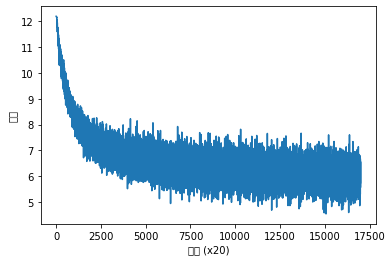

In [29]:
trainer_2.plot()

In [31]:
word_vecs = model_2.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

 [ 0.01869518 -0.01105149  0.00830576 -0.01457468 -0.00761509]
anarchism [-1.287176   -1.7744441   0.98682046 -0.974021   -2.9495966 ]
originated [ -1.8870581   -1.008891    -3.1578727    0.62970203 -16.604254  ]
as [ 2.203481    0.50598663 -0.50325155  1.6525043  -1.1213043 ]
a [-0.11440207  0.71950155 -0.5324252  -1.1345667  -3.2094393 ]
term [ 0.50387   -1.1615074 -2.2540557  1.1654536 -3.1603835]
of [ 0.8540743  -0.82522446 -0.56961715  0.19430822  0.3453494 ]
abuse [ 0.55511    -0.93618494 -3.9589999  -0.44366017 -3.003999  ]
first [ 1.7431473  -1.4230161   0.28053963  1.6519006  -0.70906526]
used [ 0.7968005  -0.23377386 -1.3711673   0.30941868 -4.8971586 ]
against [-4.6434045  -6.694633   -0.13380744  0.34117725 -6.386212  ]
early [0.8681649  0.5691161  0.14686018 4.9743476  0.21777083]
working [-1.9777257 -6.684225  -1.4856347 -4.734312   0.4465664]
class [-1.7070704 -6.170738   2.8501883  9.318129   3.0243566]
radicals [ -4.5750537  -14.140753    -0.16344252  -8.598457    -1.2

baron [ 6.680156   2.3831513 11.882074  -5.1724644  4.561967 ]
de [-6.914221   8.574909   2.5967474 12.623002   5.254032 ]
lahontan [ 7.4205747 -3.502169   8.268626  -8.604795  -1.42357  ]
nouveaux [ 1.0650513  2.082892  -1.387171   1.8001074  2.0963702]
voyages [  3.069656    -0.07690839   4.4195976  -11.865212    10.716995  ]
dans [ 0.9833922  3.4316785  7.854055  12.186498   4.4099226]
l [ -0.96054024   0.1731538    5.2115817  -10.671643     6.6395006 ]
am [ 1.6656787  0.5657936  2.0757372 14.456006  -1.7082822]
rique [  0.20911355  -3.1194499    7.9791574  -11.093464     4.7668915 ]
septentrionale [ 0.71689695  3.6138668   7.9450426  11.491076   -7.4318333 ]
seven [ -0.90922827  -0.2593437    8.830524     6.7642574  -12.25667   ]
zero [ 3.23278    -0.5710638   2.3678174  -0.81033784 -0.8892655 ]
three [-0.57307994 -0.85787517  0.5099813  -0.34763774 -1.3648702 ]
where [ 2.539283   1.0810646 -1.1111859  3.2822917  1.9363137]
he [-0.3247085   0.44565868 -1.4989744  -1.6145179  -0.031